In [5]:
from functions import *
import numpy as np

In [6]:
import os

app='sample2'

folder = os.path.join('/', 'Users', 'snair', 'works', 'dislock-experiments', 'goresults', 'manager', 'wlogs', app)

workloads = ['workloadeqeq', 'workloadeqhot', 'workloadeqclust', 'workloadhoteq','workloadhothot','workloadhotclust', 'workloadF', 'workloadG']
gran = [1]
mode = {1:[1,2,3]}
place = {1:[1,2,3]}
runs = [1,2,3,4,5]
replicas = ['houston', 'paris', 'singapore']

wl_values={}
for wl in workloads:
    configs = get_individual_data(folder, wl, gran, mode, place, runs, replicas)
    wl_values[wl] = configs

print(wl_values)


{'workloadeqeq': {'1-1-1': {'houston': {'READ': [37.712, 3.112, 3.222, 3.535, 3.252, 3.641, 2.372, 3.029, 2.495, 3.187, 2.695, 2.646, 3.167, 3.145, 2.731, 2.785, 2.677, 4.072, 3.773, 2.874, 4.756, 3.179, 25.486, 2.525, 2.342, 3.443, 2.895, 2.913, 2.997, 3.253, 3.373, 3.213, 114.245, 4.898, 4.789, 4.365, 4.32, 5.335, 4.259, 4.045, 3.741, 3.513, 3.713, 4.492, 4.178, 3.807, 3.721, 2.963, 3.539, 3.384, 3.271, 2.969, 3.917, 4.115, 5.138, 4.306, 2.983, 3.333, 3.026, 3.101, 2.836, 3.189, 2.62, 3.694, 3.442, 2.854, 2.825, 4.551, 3.428, 3.539, 3.781, 4.305, 3.717, 4.109, 4.16, 4.261, 176.477, 4.487, 4.463, 3.559, 4.25, 2.686, 3.583, 3.485, 3.928, 3.518, 3.784, 4.081, 3.624, 3.66, 4.491, 3.945, 114.336, 3.948, 3.523, 3.281, 4.18, 4.088, 3.667, 4.018, 2.99, 3.744, 3.615, 4.091, 3.374, 3.756, 115.761, 4.973, 4.882, 6.023, 3.768, 3.317, 3.589, 4.86, 3.593, 3.095, 3.209, 2.709, 2.581, 2.502, 4.56, 3.022, 2.718, 2.666, 2.58, 2.559, 3.187, 3.969, 3.62, 2.946, 3.261, 3.219, 3.432, 2.737, 3.188, 10.675,

In [7]:
def plot(wl_values, wl, replicas, name):
    generate_individual_raw_plots(wl_values[wl], replicas, wl, name)
    generate_individual_box_plots(wl_values[wl], replicas, wl, name)
    generate_individual_box_plots(wl_values[wl], replicas, wl, name, 90)
    generate_individual_box_plots(wl_values[wl], replicas, wl, name, 95)
    generate_individual_box_plots(wl_values[wl], replicas, wl, name, 99)
    generate_individual_box_plots(wl_values[wl], replicas, wl, name, 100)

In [8]:
def rep_summary(wl_values):
    res = {}
    for wl in wl_values:
        res[wl] = {}
        for config in wl_values[wl]:
            res[wl][config] = {}
            for rep in wl_values[wl][config]:
                res[wl][config][rep] = {}
                for op in wl_values[wl][config][rep]:
                    res[wl][config][rep][op] = [np.sum(wl_values[wl][config][rep][op]), len(wl_values[wl][config][rep][op])]
    return res

def printstats(wl_values, wl):
    for config in wl_values[wl]:
        s = 0
        repmax = 0
        for d in wl_values[wl][config]:
            rep = 0
            for op in wl_values[wl][config][d]:
                if wl_values[wl][config][d][op]:
                    s = s + np.sum(wl_values[wl][config][d][op])
                    rep += np.sum(wl_values[wl][config][d][op])
            repmax = max(repmax, rep)
        print(config, 'average', s/5000.0, '\n', '\t', 'total', s, '\n', '\t', 'replica maximum', repmax)
    print('*************detailed**************')
    for config in wl_values[wl]:
        for d in wl_values[wl][config]:
            for op in wl_values[wl][config][d]:
                if wl_values[wl][config][d][op]:
                    print(config, d, op)
                    print('99th:', np.percentile(wl_values[wl][config][d][op],99),'95th', np.percentile(wl_values[wl][config][d][op],95),'90th', np.percentile(wl_values[wl][config][d][op],90),'50th', np.percentile(wl_values[wl][config][d][op],50), 'mean', np.mean(wl_values[wl][config][d][op]))
        

In [9]:
rep_summary(wl_values)

{'workloadeqeq': {'1-1-1': {'houston': {'READ': [13968.66, 816],
    'INSERT': [15568.73, 854],
    'DELETE': [0.0, 0],
    'UPDATE': [0.0, 0]},
   'paris': {'READ': [245283.74000000002, 858],
    'INSERT': [232221.76799999998, 812],
    'DELETE': [0.0, 0],
    'UPDATE': [0.0, 0]},
   'singapore': {'READ': [371159.46699999995, 671],
    'INSERT': [364654.266, 657],
    'DELETE': [0.0, 0],
    'UPDATE': [0.0, 0]}},
  '1-1-2': {'houston': {'READ': [247602.639, 805],
    'INSERT': [265523.714, 865],
    'DELETE': [0.0, 0],
    'UPDATE': [0.0, 0]},
   'paris': {'READ': [25799.893000000004, 823],
    'INSERT': [22207.652000000002, 847],
    'DELETE': [0.0, 0],
    'UPDATE': [0.0, 0]},
   'singapore': {'READ': [254625.424, 825],
    'INSERT': [256796.597, 835],
    'DELETE': [0.0, 0],
    'UPDATE': [0.0, 0]}},
  '1-1-3': {'houston': {'READ': [433693.86600000004, 855],
    'INSERT': [413935.273, 815],
    'DELETE': [0.0, 0],
    'UPDATE': [0.0, 0]},
   'paris': {'READ': [417644.572, 825],
   

In [13]:
freq = {'workloadeqeq':{'INSERT':{'houston':167, 'paris':167, 'singapore':166}, 'READ':{'houston':167, 'paris':167, 'singapore':166}},
       'workloadeqhot':{'INSERT':{'houston':0, 'paris':500, 'singapore':0}, 'READ':{'houston':0, 'paris':500, 'singapore':0}},
        'workloadeqclust':{'INSERT':{'houston':250, 'paris':250, 'singapore':0}, 'READ':{'houston':250, 'paris':250, 'singapore':0}},
        'workloadhoteq':{'INSERT':{'houston':333, 'paris':334, 'singapore':333}, 'READ':{'houston':0, 'paris':0, 'singapore':0}},
        'workloadhothot':{'INSERT':{'houston':0, 'paris':1000, 'singapore':0}, 'READ':{'houston':0, 'paris':0, 'singapore':0}},
        'workloadhotclust':{'INSERT':{'houston':500, 'paris':500, 'singapore':0}, 'READ':{'houston':0, 'paris':0, 'singapore':0}},
        'workloadF':{'INSERT':{'houston':0, 'paris':500, 'singapore':0}, 'READ':{'houston':167, 'paris':167, 'singapore':166}},
        'workloadG':{'INSERT':{'houston':0, 'paris':500, 'singapore':0}, 'READ':{'houston':250, 'paris':0, 'singapore':250}}
       }

def total_exec_time(wl_values):
    values = rep_summary(wl_values)
    results = {}
    for wl in wl_values:
        results[wl] = {}
        for config in values[wl]:
            res = 0
            for r in values[wl][config]:
                rep_time = 0
                for op in values[wl][config][r]:
                    if op in freq[wl] and values[wl][config][r][op][1]:
                        rep_time += values[wl][config][r][op][0] / values[wl][config][r][op][1] * freq[wl][op][r]
                res = res + rep_time
            results[wl][config] = res
#             print(res)
    return results

In [15]:
experimental_results = total_exec_time(wl_values)
print(experimental_results)

{'workloadeqeq': {'1-1-1': 285361.5883349419, '1-1-2': 214528.29293910763, '1-1-3': 345643.29261929495, '1-2-1': 279463.2124972031, '1-2-2': 209378.76618958882, '1-2-3': 319742.6148896055, '1-3-1': 277899.1506731294, '1-3-2': 206176.79124778934, '1-3-3': 318804.32890029403}, 'workloadeqhot': {'1-1-1': 226047.38935379317, '1-1-2': 3592.945782958952, '1-1-3': 306116.163170235, '1-2-1': 226040.55980125238, '1-2-2': 3511.1173146921883, '1-2-3': 306086.5171485187, '1-3-1': 225989.30106256454, '1-3-2': 3592.5030285992507, '1-3-3': 306056.1584051332}, 'workloadeqclust': {'1-1-1': 117197.25858217812, '1-1-2': 117386.78937115689, '1-1-3': 506191.66193187603, '1-2-1': 117077.29042188813, '1-2-2': 117121.69563522766, '1-2-3': 453470.5860228664, '1-3-1': 117419.79205166061, '1-3-2': 117008.73146489618, '1-3-3': 468111.11451116455}, 'workloadhoteq': {'1-1-1': 291005.9645, '1-1-2': 216488.77140000003, '1-1-3': 345316.34380000003, '1-2-1': 290652.8632, '1-2-2': 216497.94805, '1-2-3': 343346.9336, '1-

In [51]:
# hardcoding for sample2

def printmetrics(wl_values, wl):
    values = rep_summary(wl_values)
    for config in values[wl]:
        nonparallelism = 0
        mode = config[2:3]
        for d in values[wl][config]:
            op_serial = 0
            rep_serial = 0
            op_parallel = 0
            if mode == '1': #MX
                for r in values[wl][config]:
                    if r != d:
                        for op in ['INSERT', 'READ']:
                            op_serial += values[wl][config][r][op][0]
                for op in ['INSERT', 'READ']:
                    rep_serial += values[wl][config][d][op][0]
            elif mode == '2': #XS
                for r in wl_values[wl][config]:
                    if r != d:
                        for op in ['INSERT']:
                            op_serial += values[wl][config][r][op][0]
                        for op in ['READ']:
                            op_parallel += values[wl][config][r][op][0]
                for op in ['INSERT', 'READ']:
                    rep_serial += values[wl][config][d][op][0]
            else: # SX
                for r in wl_values[wl][config]:
                    if r != d:
                        for op in ['READ']:
                            op_serial += values[wl][config][r][op][0]
                        for op in ['INSERT']:
                            op_parallel += values[wl][config][r][op][0]
                for op in ['INSERT', 'READ']:
                    rep_serial += values[wl][config][d][op][0]
            print(config, d, 'op_serial', op_serial, '\n', '\t', 'rep_serial', rep_serial, '\n', '\t', 'op_parallel', op_parallel)
            nonp = abs(op_serial + rep_serial - op_parallel)
            nonparallelism = max(nonparallelism, nonp)
        print(config, 'nonparallelism', nonparallelism)

In [52]:
def op_serial(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            mode = config[2:3]
            for d in values[wl][config]:
                op_serial = 0
                if mode == '1': #MX
                    for r in values[wl][config]:
                        if r != d:
                            for op in ['INSERT', 'READ']:
                                op_serial += values[wl][config][r][op][0]
                elif mode == '2': #XS
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['INSERT']:
                                op_serial += values[wl][config][r][op][0]
                else: # SX
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['READ']:
                                op_serial += values[wl][config][r][op][0]
                print(op_serial/len(runs))

In [53]:
op_serial(wl_values)

242663.84819999998
153070.2246
101408.57960000001
111885.9132
204909.67479999998
112226.77960000001
176115.9668
176509.6666
338657.9558
141771.9432
95033.2216
55476.094
58822.490000000005
101797.93340000001
55196.623
79763.96119999999
92689.9296
164656.17560000002
137516.78680000003
91717.95120000001
52338.666000000005
61188.15759999999
97566.12419999999
45732.06540000001
47094.8434
52739.50379999999
95226.7396
226047.7732
0.0
226047.7732
3592.5758
0.0
3592.5758
306116.201
0.0
306116.201
113398.62280000001
0.0
113398.62280000001
1774.8057999999996
0.0
1774.8057999999996
123134.367
0.0
123134.367
114540.63200000001
0.0
114540.63200000001
1792.8612
0.0
1792.8612
154607.14500000002
0.0
154607.14500000002
113358.16459999999
3839.3542
117197.5188
3981.0860000000002
113397.28259999999
117378.36859999997
252893.39920000004
253298.6802
506192.0794
57246.7088
2170.0772
59416.786
2524.8036
54726.927
57251.730599999995
83169.70420000001
76383.8336
159553.5378
55748.08940000001
2562.0667999999996


In [54]:
def rep_serial(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            mode = config[2:3]
            for d in values[wl][config]:
                rep_serial = 0
                for op in ['INSERT', 'READ']:
                    rep_serial += values[wl][config][d][op][0]
                print(rep_serial/len(runs))


In [55]:
rep_serial(wl_values)

5907.478
95501.10160000001
147162.7466
102625.2706
9601.509000000002
102284.4042
169525.8278
169132.12799999997
6983.8387999999995
6415.1206
95440.23980000001
177763.454
93879.8348
9076.1868
106292.07680000001
172776.6556
141395.898
5455.0424
5104.045
95304.33840000001
177340.68860000002
75454.921
6833.438400000001
105324.3284
103712.8738
84103.92039999999
3340.8438
0.0
226047.7732
0.0
0.0
3592.5758
0.0
0.0
306116.201
0.0
0.0
226040.66620000004
0.0
0.0
3511.2219999999993
0.0
0.0
244869.5022
0.0
0.0
225989.5494
0.0
0.0
3592.4808000000003
0.0
0.0
306055.90260000003
0.0
3839.3542
113358.16459999999
0.0
113397.28259999999
3981.0860000000002
0.0
253298.6802
252893.39920000004
0.0
3770.6042
113307.42760000001
0.0
113351.51840000002
3793.2766
0.0
155230.8312
155750.86359999998
0.0
4017.4316
113394.0636
0.0
113276.57519999999
3728.2698000000005
0.0
258651.7506
209507.3846
0.0
4784.0316
80421.8392
147598.9008
102786.59599999999
10800.4686
102901.70680000001
169019.7016
169129.8066
7166.8356
575

In [56]:
def op_parallel(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            mode = config[2:3]
            for d in values[wl][config]:
                op_parallel = 0
                if mode == '1': #MX
                    pass
                elif mode == '2': #XS
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['READ']:
                                op_parallel += values[wl][config][r][op][0]
                else: # SX
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['INSERT']:
                                op_parallel += values[wl][config][r][op][0]
                print(op_parallel/len(runs))


In [57]:
op_parallel(wl_values)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
131431.7506
89145.353
46379.2664
56545.7736
98373.97820000001
47759.3986
67086.97919999999
85541.76840000002
149516.378
135128.24020000003
90726.7824
48069.71740000001
50969.6092
83213.1252
36556.294
40349.9208
54314.213800000005
92590.0546
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
112642.04340000001
0.0
112642.04340000001
1736.4161999999997
0.0
1736.4161999999997
121735.13519999999
0.0
121735.13519999999
111448.9174
0.0
111448.9174
1799.6196000000004
0.0
1799.6196000000004
151448.7576
0.0
151448.7576
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
56060.718799999995
1600.527
57661.2458
1268.473
58624.59140000001
59893.06440000001
72581.1594
78846.9976
151428.157
57645.9742
1455.3648
59101.339
1676.6324
55833.021400000005
57509.65380000001
95894.5146
125151.03
221045.5446
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
244375.8344
170022.5266
76976.54060000001
103303.234
177487.74920000002
76624.6636
103638.9984
169937.6896
271108.34280000004
0

In [58]:
def non_parallel(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            nonparallelism = 0
            mode = config[2:3]
            for d in values[wl][config]:
                op_serial = 0
                rep_serial = 0
                op_parallel = 0
                if mode == '1': #MX
                    for r in values[wl][config]:
                        if r != d:
                            for op in ['INSERT', 'READ']:
                                op_serial += values[wl][config][r][op][0]
                    for op in ['INSERT', 'READ']:
                        rep_serial += values[wl][config][d][op][0]
                elif mode == '2': #XS
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['INSERT']:
                                op_serial += values[wl][config][r][op][0]
                            for op in ['READ']:
                                op_parallel += values[wl][config][r][op][0]
                    for op in ['INSERT', 'READ']:
                        rep_serial += values[wl][config][d][op][0]
                else: # SX
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['READ']:
                                op_serial += values[wl][config][r][op][0]
                            for op in ['INSERT']:
                                op_parallel += values[wl][config][r][op][0]
                    for op in ['INSERT', 'READ']:
                        rep_serial += values[wl][config][d][op][0]
#                 print(config, d, 'op_serial', op_serial, '\n', '\t', 'rep_serial', rep_serial, '\n', '\t', 'op_parallel', op_parallel)
                nonp = abs(op_serial + rep_serial - op_parallel)
                nonparallelism = max(nonparallelism, nonp)
            print(nonparallelism/len(runs))

In [59]:
non_parallel(wl_values)

248571.3262
214511.1838
345641.79459999996
186860.28160000002
113729.30120000002
185453.63760000002
181609.6372
114500.09980000001
110457.79640000002
226047.7732
3592.5758
306116.201
226040.66620000004
3511.2219999999993
244869.5022
225989.5494
3592.4808000000003
306055.90260000003
117197.5188
117378.3686
506192.07940000005
113876.97780000002
114607.84900000002
165819.376
114500.7656
113651.5802
276370.106
232804.77160000004
216488.77140000003
345316.34380000003
290652.8632
214209.9338
343346.9336
243064.21800000002
176267.675
269874.17020000005
226024.49
3420.9561999999996
306135.1614
225995.4752
3623.4826000000003
306077.85020000004
225984.24620000002
2880.2784
306021.9242
117372.42820000001
117125.7614
506316.2456
117438.74680000001
94033.70180000001
506280.19839999994
115085.18259999999
114831.78879999998
406410.5092
278314.4236
123978.00780000002
195714.48220000003
189648.08279999997
75922.5674
215609.6508
278722.06999999995
124843.48640000001
324818.9504
305603.9046
168472.247799

In [95]:
freq = {'workloadeqeq':{'INSERT':{'houston':167, 'paris':167, 'singapore':166}, 'READ':{'houston':167, 'paris':167, 'singapore':166}},
       'workloadeqhot':{'INSERT':{'houston':0, 'paris':500, 'singapore':0}, 'READ':{'houston':0, 'paris':500, 'singapore':0}},
        'workloadeqclust':{'INSERT':{'houston':250, 'paris':250, 'singapore':0}, 'READ':{'houston':250, 'paris':250, 'singapore':0}},
        'workloadhoteq':{'INSERT':{'houston':333, 'paris':334, 'singapore':333}, 'READ':{'houston':0, 'paris':0, 'singapore':0}},
        'workloadhothot':{'INSERT':{'houston':0, 'paris':1000, 'singapore':0}, 'READ':{'houston':0, 'paris':0, 'singapore':0}},
        'workloadhotclust':{'INSERT':{'houston':500, 'paris':500, 'singapore':0}, 'READ':{'houston':0, 'paris':0, 'singapore':0}},
        'workloadF':{'INSERT':{'houston':0, 'paris':500, 'singapore':0}, 'READ':{'houston':167, 'paris':167, 'singapore':166}},
        'workloadG':{'INSERT':{'houston':0, 'paris':500, 'singapore':0}, 'READ':{'houston':250, 'paris':0, 'singapore':250}}
       }

def max_exec_time(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            res = 0
            for r in values[wl][config]:
                normalized = 0
                for op in values[wl][config][r]:
                    if values[wl][config][r][op][1]:
                        normalized += values[wl][config][r][op][0] / values[wl][config][r][op][1] * freq[wl][op][r]
#                         print(values[wl][config][r][op][0], values[wl][config][r][op][1], freq[wl][op][r], normalized)
#                     rep_time += values[wl][config][r][op][0]
                res = max(res, normalized)
            print(res)

In [96]:
max_exec_time(wl_values)

183956.73297681508
102628.97312079128
169528.434811086
177748.42482435855
106318.89459726319
172750.42441898826
177383.65674026578
105276.5026390523
172879.86987240025
226047.38935379317
3592.945782958952
306116.163170235
226040.55980125238
3511.1173146921883
306086.5171485187
225989.30106256454
3592.5030285992507
306056.1584051332
113359.25653795703
113397.52610113853
253299.1612672225
113305.76528646378
113358.11459811918
258768.57613985654
113394.1835097138
113276.87262574767
258603.72991116456
184498.62600000002
102901.7068
169129.8066
184455.67540000004
102603.6688
169148.8558
168710.91019999998
102083.1598
168703.51700000002
226024.49
3420.9562
306135.16140000004
225995.4752
3623.4826
306077.85020000004
225984.24620000002
3600.348
306021.9242
113406.83900000002
113395.69780000001
253293.388
113395.77120000002
113427.79475
253299.88339999996
113202.26639999998
113112.93199999999
253215.27079999997
175539.17608319726
52142.847
237746.48304046295
169845.7491482888
51584.74800000001


In [70]:
def avg_exec_time(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            res = 0
            n = 0
            for r in values[wl][config]:
                for op in values[wl][config][r]:
                    res += values[wl][config][r][op][0]
                    n += values[wl][config][r][op][1]
#             print(res, n)
            print(res/n)

In [71]:
avg_exec_time(wl_values)

266.2503494001714
214.5111838
345.6417946
279.6188144
209.2480984
319.627596
277.749072
201.04231440205743
318.5960633333333
226.0477732
3.5925758
306.11620100000005
226.04066620000006
3.511221999999999
306.08687775
225.9895494
3.5924808000000006
306.0559026000001
117.19751880000001
117.37836859999997
506.19207940000007
117.07803179999999
117.14479500000002
444.25956399999995
117.4114952
117.00484499999999
468.1591352
291.0059645
216.48877140000002
345.3163438
290.6528632
229.54343527646807
343.34693359999994
245.6874508
178.7078234
272.3425154
226.02449
3.4209562
306.1351614
225.9954752
3.6234826
306.07785020000006
225.98424620000003
3.600348
306.0219242
117.37242820000002
117.1257614
506.3162456
117.4387468
117.54212725000001
506.2801983999999
115.08518259999998
114.83178879999998
406.4105092
278.3144236
123.97800780000001
326.1908036666667
264.1614824
113.62176500000001
316.1538508
278.72207000000003
124.8434864
324.81895039999995
305.6039046
168.4722478
334.98149140000004
302.81153

In [72]:
def rep_exec_time(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            for r in values[wl][config]:
                rep_time = 0
                for op in values[wl][config][r]:
                    rep_time += values[wl][config][r][op][0]
                print(rep_time/len(runs))

In [73]:
rep_exec_time(wl_values)

5907.478
95501.10160000001
147162.7466
102625.2706
9601.509000000002
102284.4042
169525.8278
169132.12799999997
6983.8387999999995
6415.1206
95440.23980000001
177763.454
93879.8348
9076.1868
106292.07680000001
172776.6556
141395.898
5455.0424
5104.045
95304.33840000001
177340.68860000002
75454.921
6833.438400000001
105324.3284
103712.8738
84103.92039999999
3340.8438
0.0
226047.7732
0.0
0.0
3592.5758
0.0
0.0
306116.201
0.0
0.0
226040.66620000004
0.0
0.0
3511.2219999999993
0.0
0.0
244869.5022
0.0
0.0
225989.5494
0.0
0.0
3592.4808000000003
0.0
0.0
306055.90260000003
0.0
3839.3542
113358.16459999999
0.0
113397.28259999999
3981.0860000000002
0.0
253298.6802
252893.39920000004
0.0
3770.6042
113307.42760000001
0.0
113351.51840000002
3793.2766
0.0
155230.8312
155750.86359999998
0.0
4017.4316
113394.0636
0.0
113276.57519999999
3728.2698000000005
0.0
258651.7506
209507.3846
0.0
4784.0316
80421.8392
147598.9008
102786.59599999999
10800.4686
102901.70680000001
169019.7016
169129.8066
7166.8356
575

In [17]:
wl = 'workloadeqeq'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 1213319.241 
 	 rep_serial 29537.39 
 	 op_parallel 0
1-1-1 paris op_serial 765351.1229999999 
 	 rep_serial 477505.50800000003 
 	 op_parallel 0
1-1-1 singapore op_serial 507042.89800000004 
 	 rep_serial 735813.733 
 	 op_parallel 0
1-1-1 nonparallelism 1242856.631
1-1-2 houston op_serial 559429.566 
 	 rep_serial 513126.353 
 	 op_parallel 0
1-1-2 paris op_serial 1024548.374 
 	 rep_serial 48007.545000000006 
 	 op_parallel 0
1-1-2 singapore op_serial 561133.898 
 	 rep_serial 511422.021 
 	 op_parallel 0
1-1-2 nonparallelism 1072555.919
1-1-3 houston op_serial 880579.8339999999 
 	 rep_serial 847629.139 
 	 op_parallel 0
1-1-3 paris op_serial 882548.333 
 	 rep_serial 845660.6399999999 
 	 op_parallel 0
1-1-3 singapore op_serial 1693289.7789999999 
 	 rep_serial 34919.193999999996 
 	 op_parallel 0
1-1-3 nonparallelism 1728208.9729999998
1-2-1 houston op_serial 708859.716 
 	 rep_serial 32075.603000000003 
 	 op_parallel 657158.753
1-2-1 paris op_serial 4751

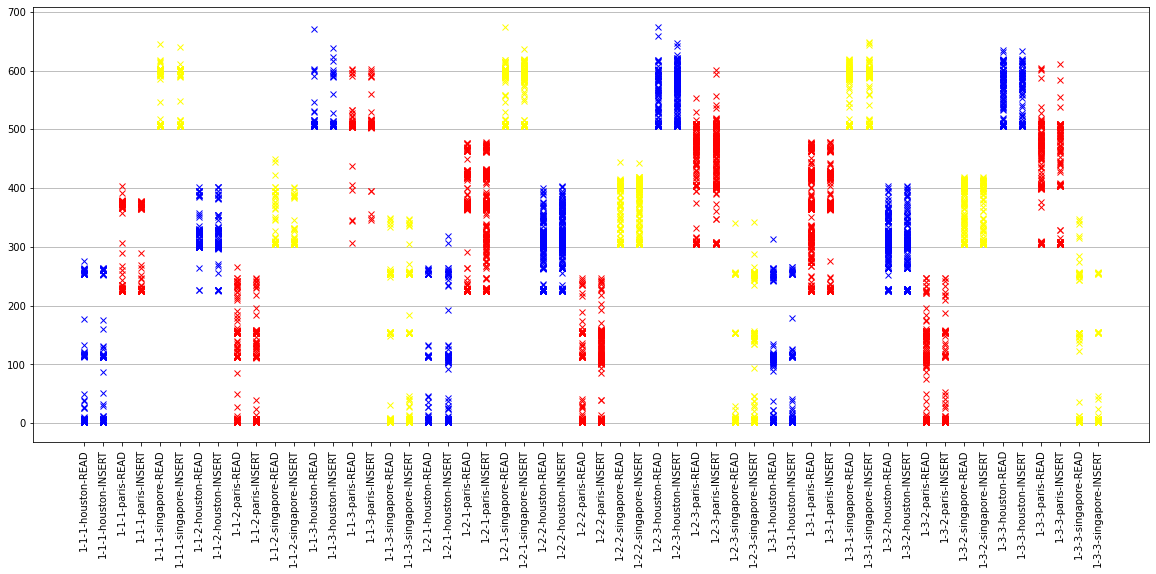

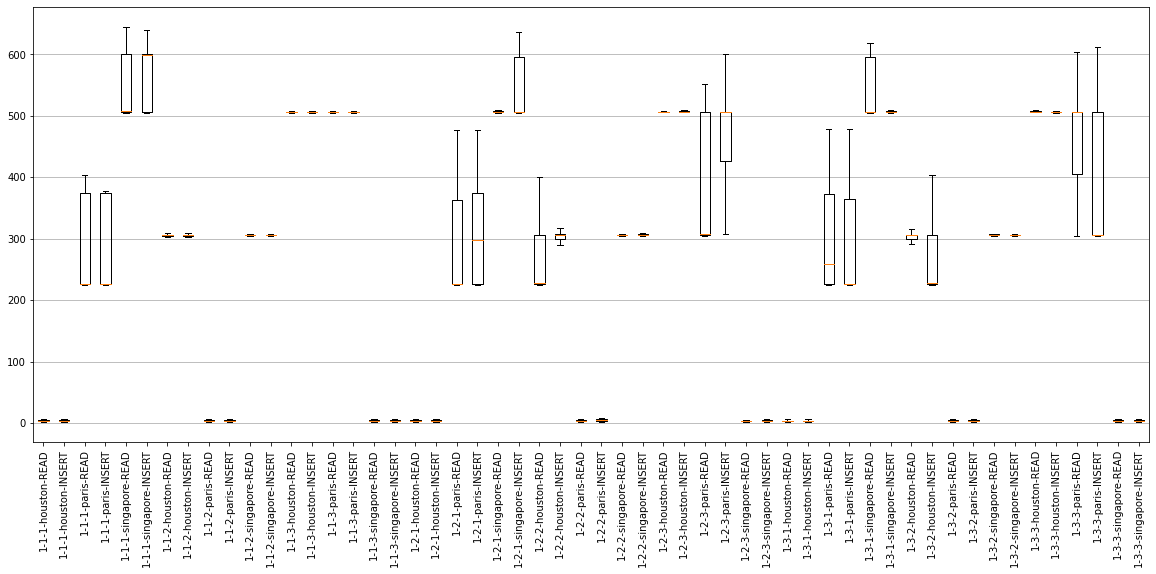

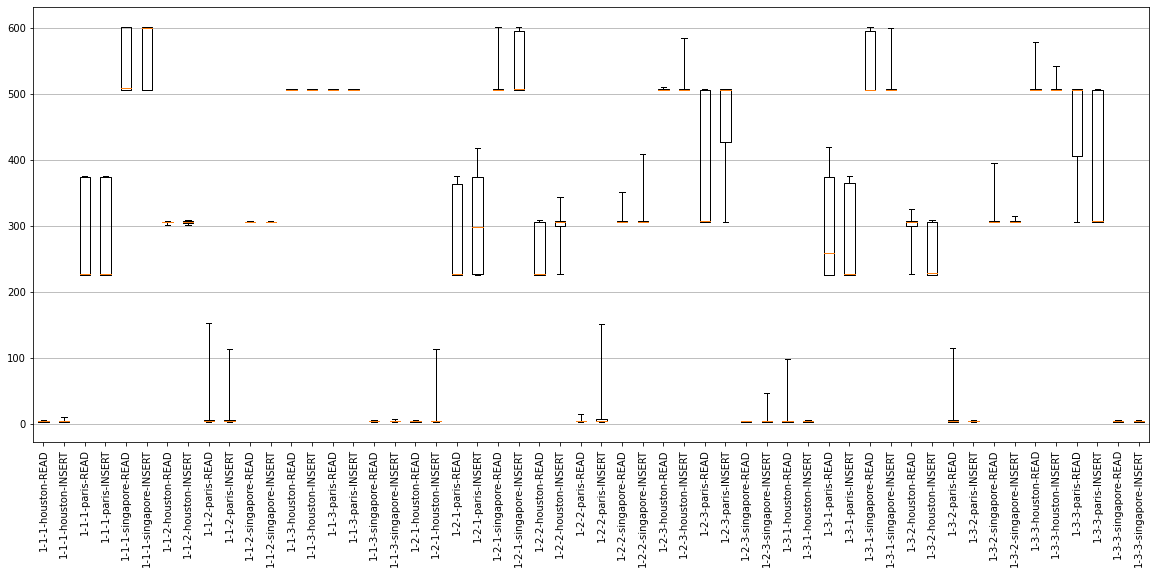

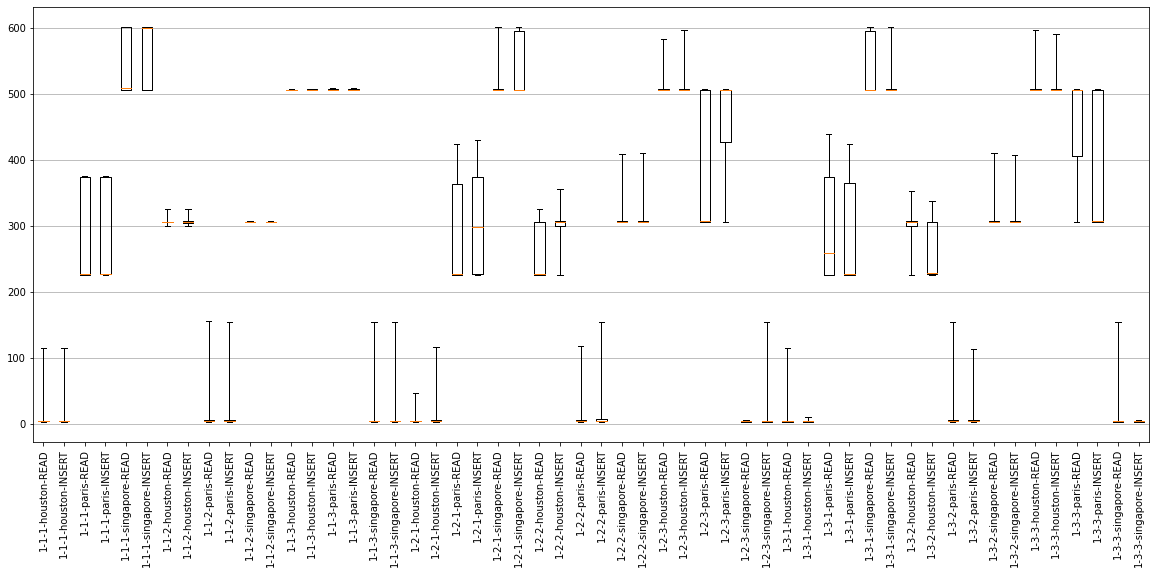

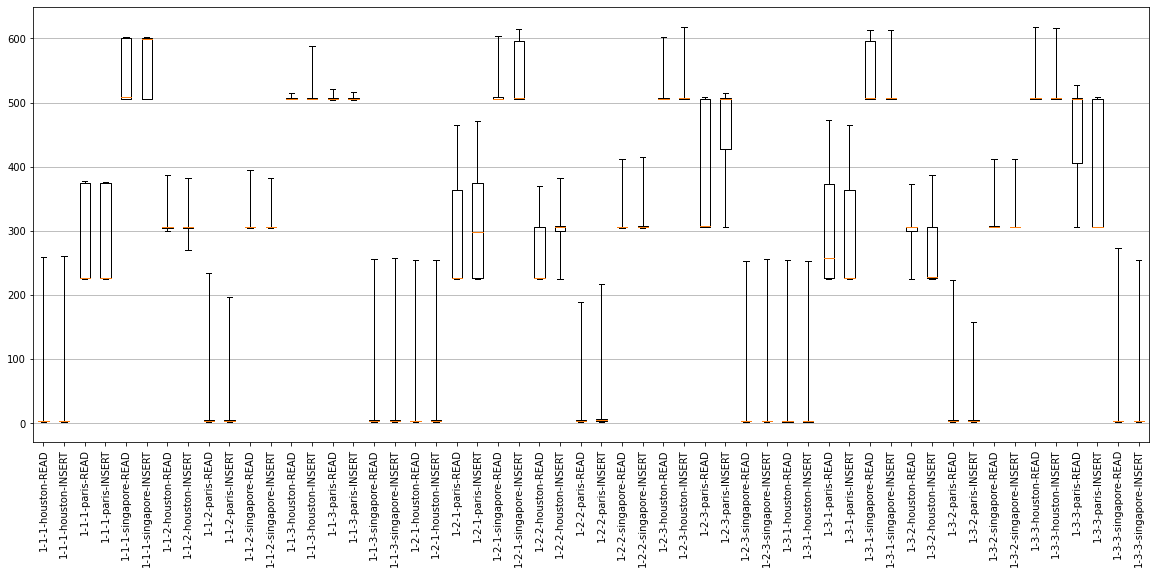

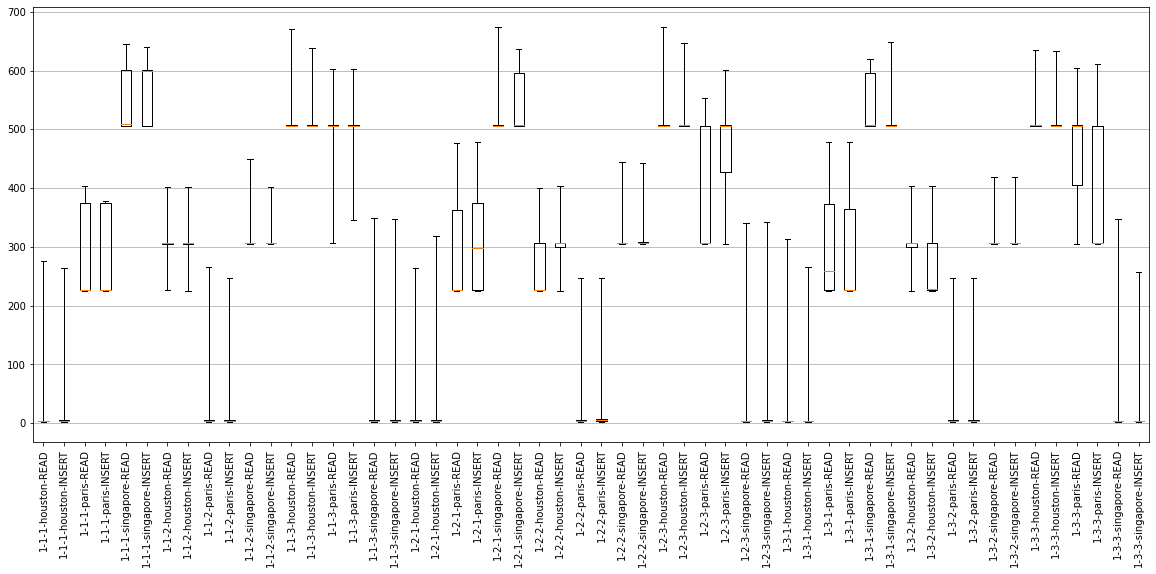

In [18]:
plot(wl_values, wl, replicas, name)

In [19]:
wl = 'workloadeqhot'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 1130238.866 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 paris op_serial 0.0 
 	 rep_serial 1130238.866 
 	 op_parallel 0
1-1-1 singapore op_serial 1130238.866 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 nonparallelism 1130238.866
1-1-2 houston op_serial 17962.879 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 paris op_serial 0.0 
 	 rep_serial 17962.879 
 	 op_parallel 0
1-1-2 singapore op_serial 17962.879 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 nonparallelism 17962.879
1-1-3 houston op_serial 1530581.0050000001 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 paris op_serial 0.0 
 	 rep_serial 1530581.0050000001 
 	 op_parallel 0
1-1-3 singapore op_serial 1530581.0050000001 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 nonparallelism 1530581.0050000001
1-2-1 houston op_serial 566993.1140000001 
 	 rep_serial 0.0 
 	 op_parallel 563210.2170000001
1-2-1 paris op_serial 0.0 
 	 rep_serial 1130203.3310000002 
 	 op_parallel 0.0
1-2-1 singapore op_serial 566993.1140000001 
 	 r

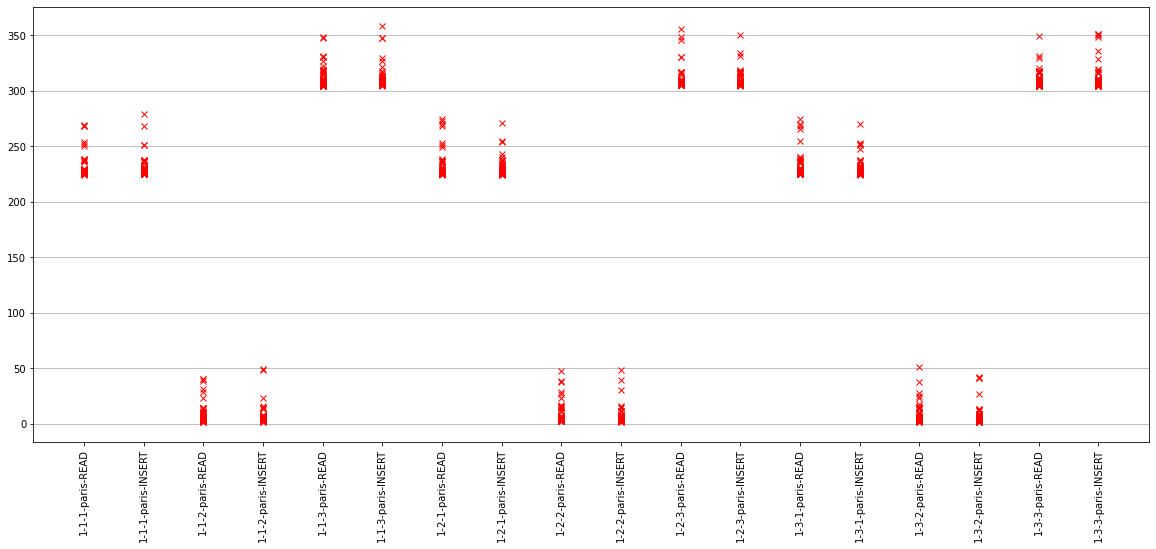

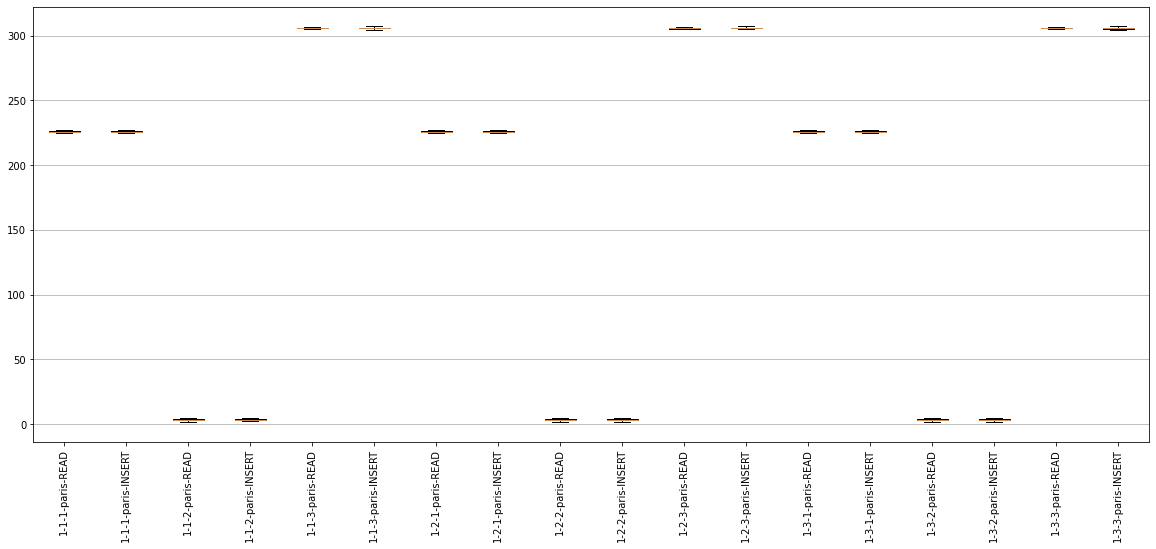

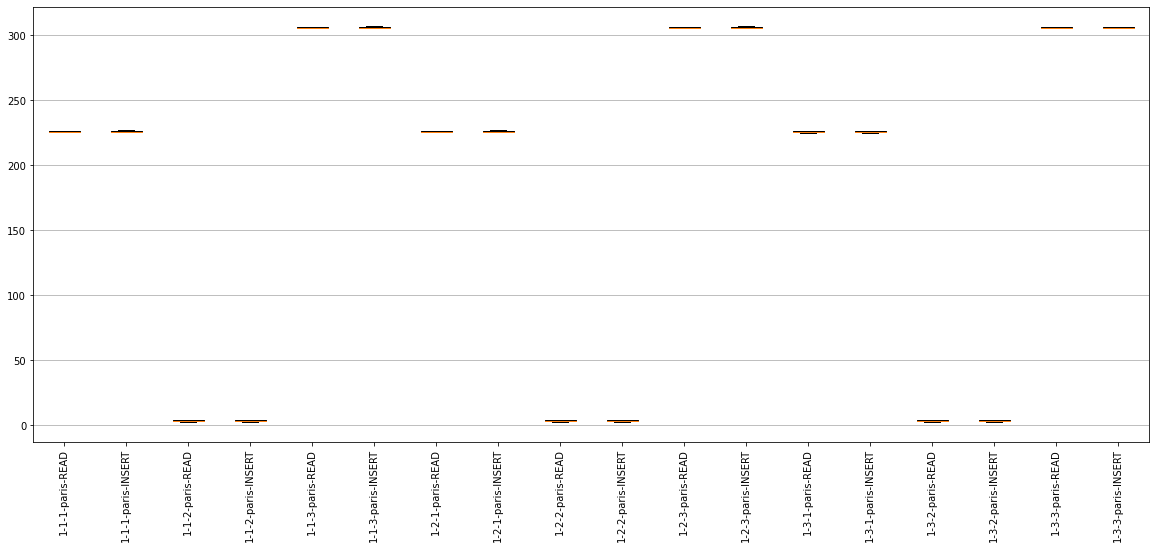

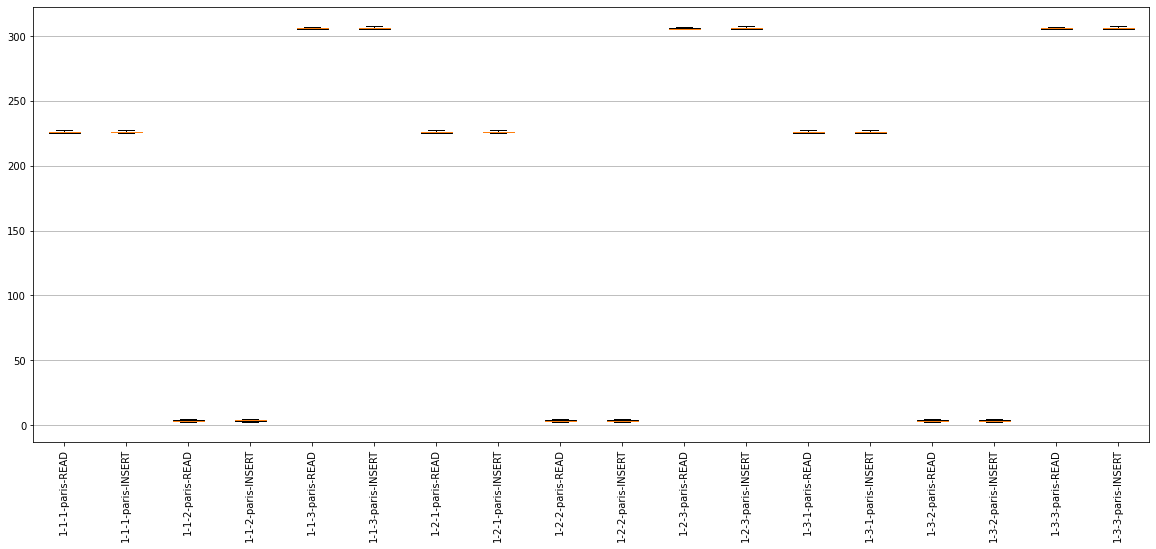

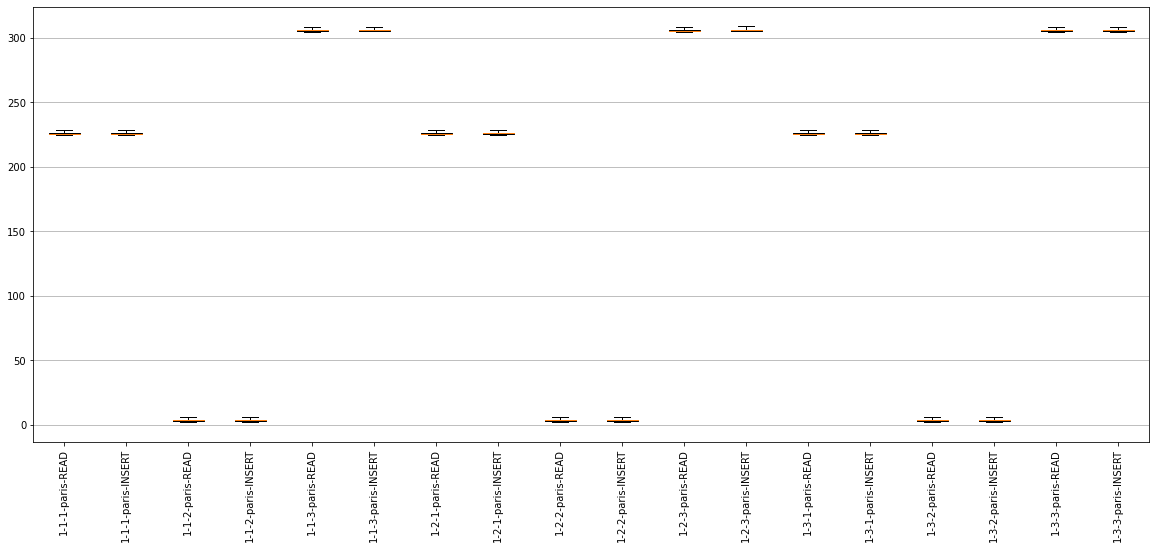

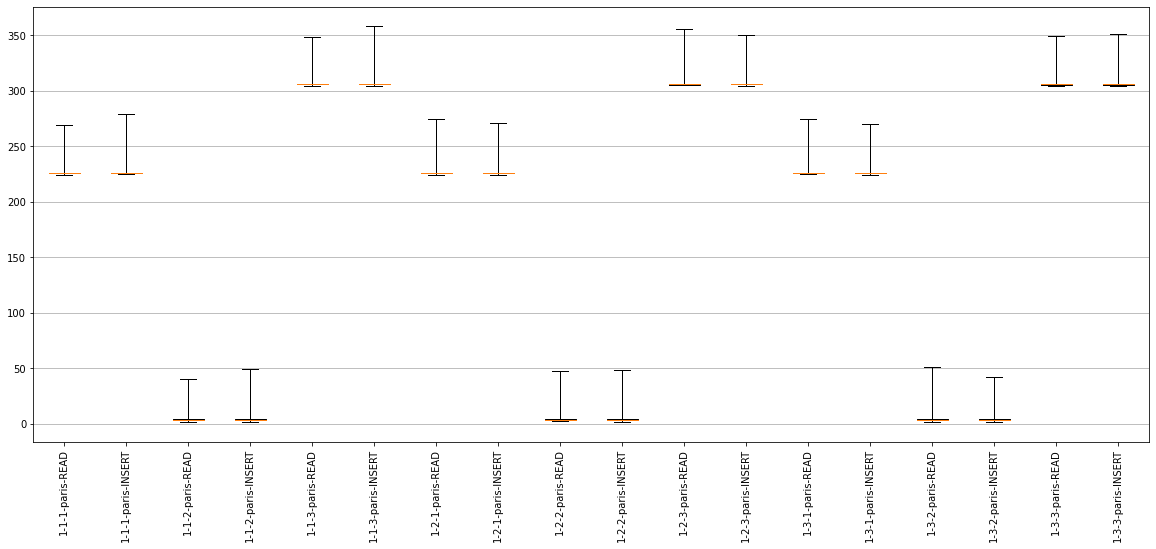

In [20]:
plot(wl_values, wl, replicas, name)

In [21]:
wl = 'workloadeqclust'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 566790.823 
 	 rep_serial 19196.771 
 	 op_parallel 0
1-1-1 paris op_serial 19196.771 
 	 rep_serial 566790.823 
 	 op_parallel 0
1-1-1 singapore op_serial 585987.594 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 nonparallelism 585987.594
1-1-2 houston op_serial 19905.43 
 	 rep_serial 566986.413 
 	 op_parallel 0
1-1-2 paris op_serial 566986.413 
 	 rep_serial 19905.43 
 	 op_parallel 0
1-1-2 singapore op_serial 586891.8429999999 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 nonparallelism 586891.843
1-1-3 houston op_serial 1264466.9960000003 
 	 rep_serial 1266493.401 
 	 op_parallel 0
1-1-3 paris op_serial 1266493.401 
 	 rep_serial 1264466.9960000003 
 	 op_parallel 0
1-1-3 singapore op_serial 2530960.397 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 nonparallelism 2530960.3970000003
1-2-1 houston op_serial 286233.544 
 	 rep_serial 18853.021 
 	 op_parallel 280303.594
1-2-1 paris op_serial 10850.386 
 	 rep_serial 566537.138 
 	 op_parallel 8002.635
1-2-1 singapore 

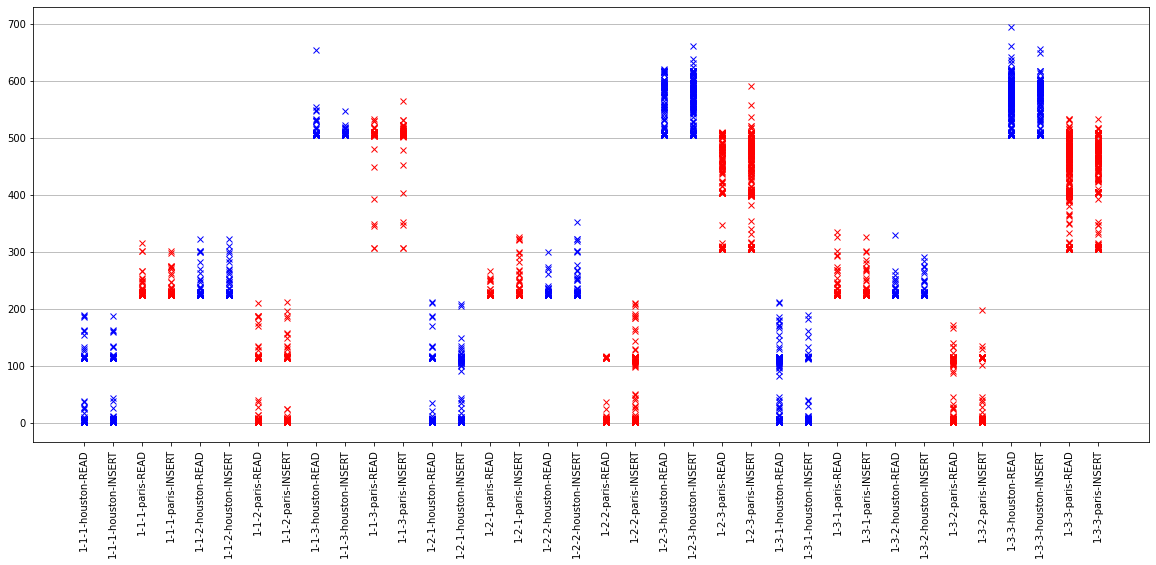

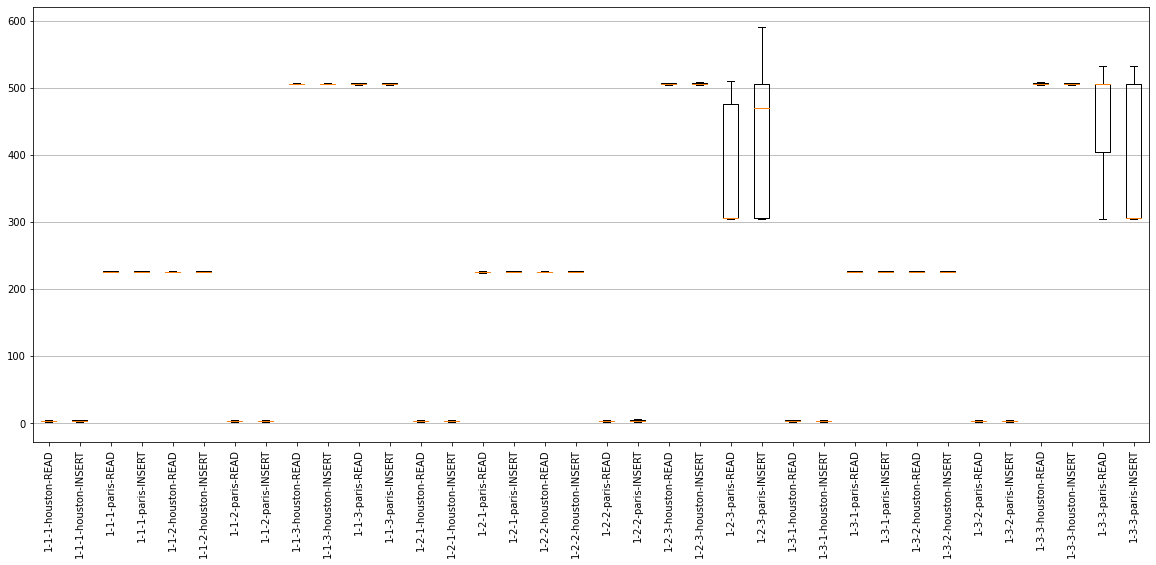

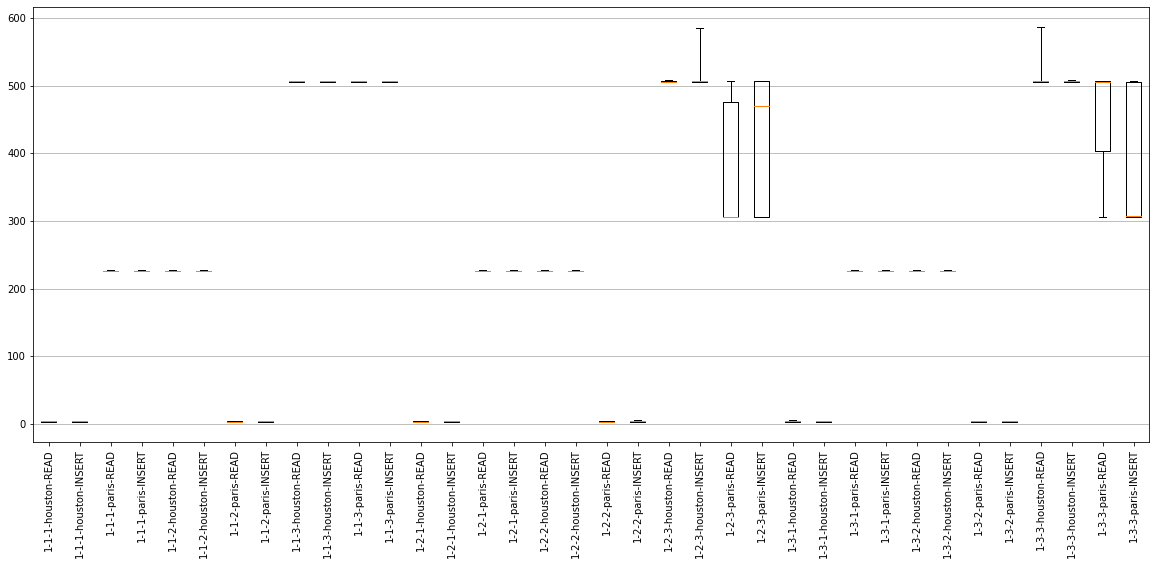

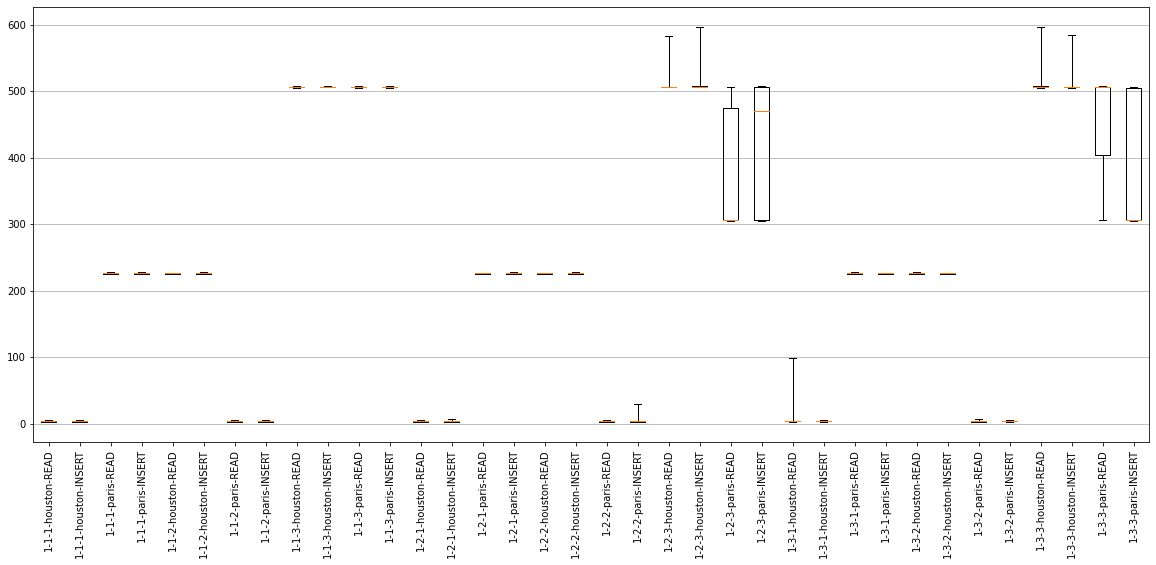

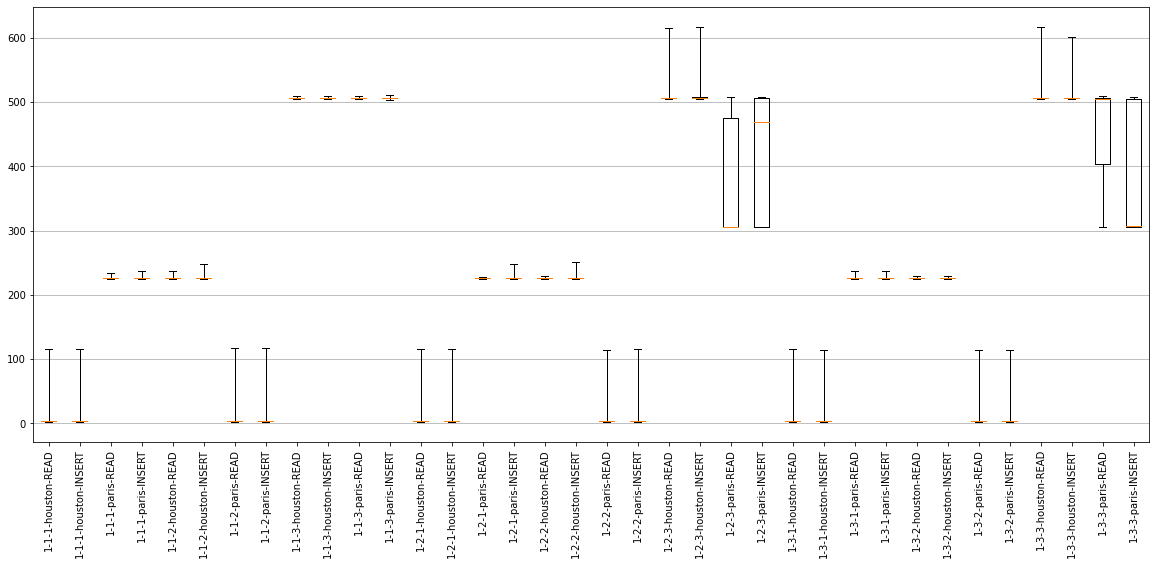

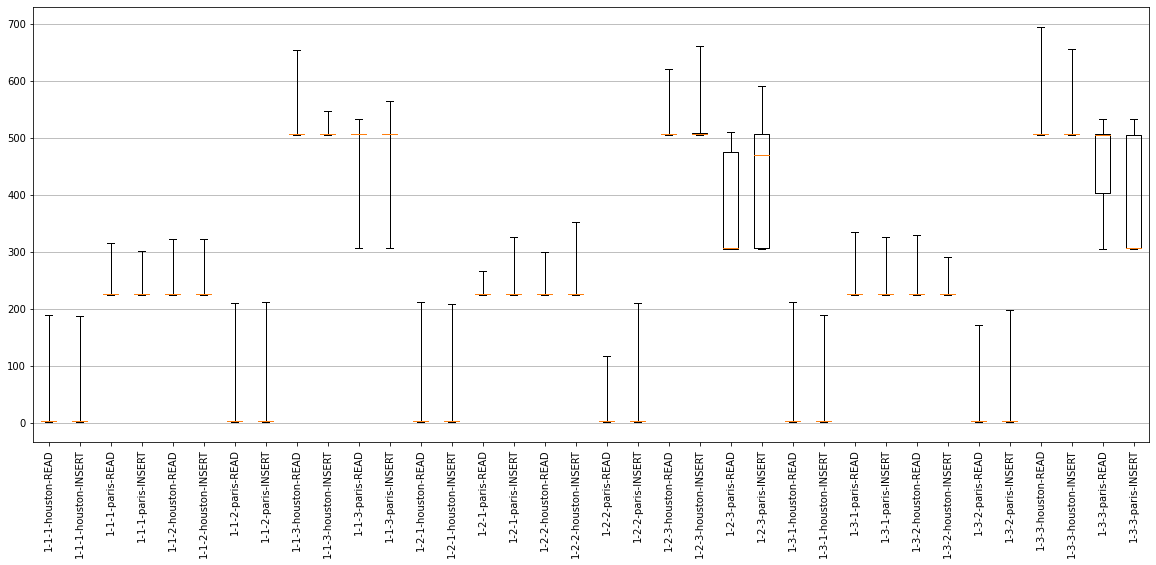

In [22]:
plot(wl_values, wl, replicas, name)

In [23]:
wl = 'workloadhoteq'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 1140103.7000000002 
 	 rep_serial 23920.158 
 	 op_parallel 0
1-1-1 paris op_serial 761914.6620000001 
 	 rep_serial 402109.196 
 	 op_parallel 0
1-1-1 singapore op_serial 426029.354 
 	 rep_serial 737994.5040000001 
 	 op_parallel 0
1-1-1 nonparallelism 1164023.8580000002
1-1-2 houston op_serial 568510.8770000001 
 	 rep_serial 513932.98 
 	 op_parallel 0
1-1-2 paris op_serial 1028441.514 
 	 rep_serial 54002.343 
 	 op_parallel 0
1-1-2 singapore op_serial 567935.323 
 	 rep_serial 514508.53400000004 
 	 op_parallel 0
1-1-2 nonparallelism 1082443.857
1-1-3 houston op_serial 881483.211 
 	 rep_serial 845098.508 
 	 op_parallel 0
1-1-3 paris op_serial 880932.686 
 	 rep_serial 845649.033 
 	 op_parallel 0
1-1-3 singapore op_serial 1690747.5410000002 
 	 rep_serial 35834.178 
 	 op_parallel 0
1-1-3 nonparallelism 1726581.7190000003
1-2-1 houston op_serial 1424492.6030000001 
 	 rep_serial 28771.713 
 	 op_parallel 0.0
1-2-1 paris op_serial 951050.0900000001 
 	 re

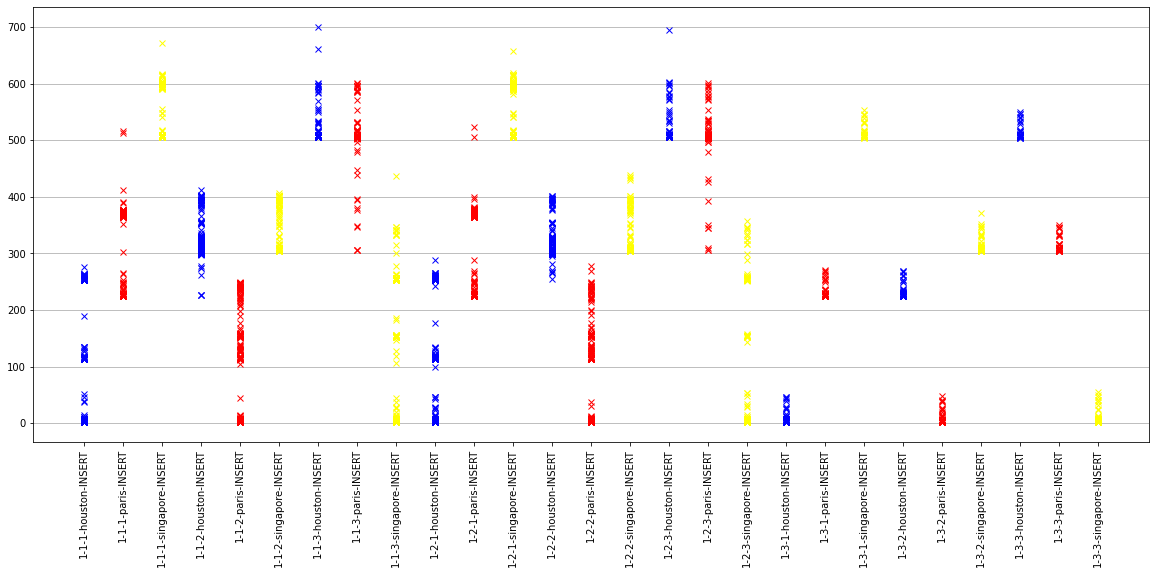

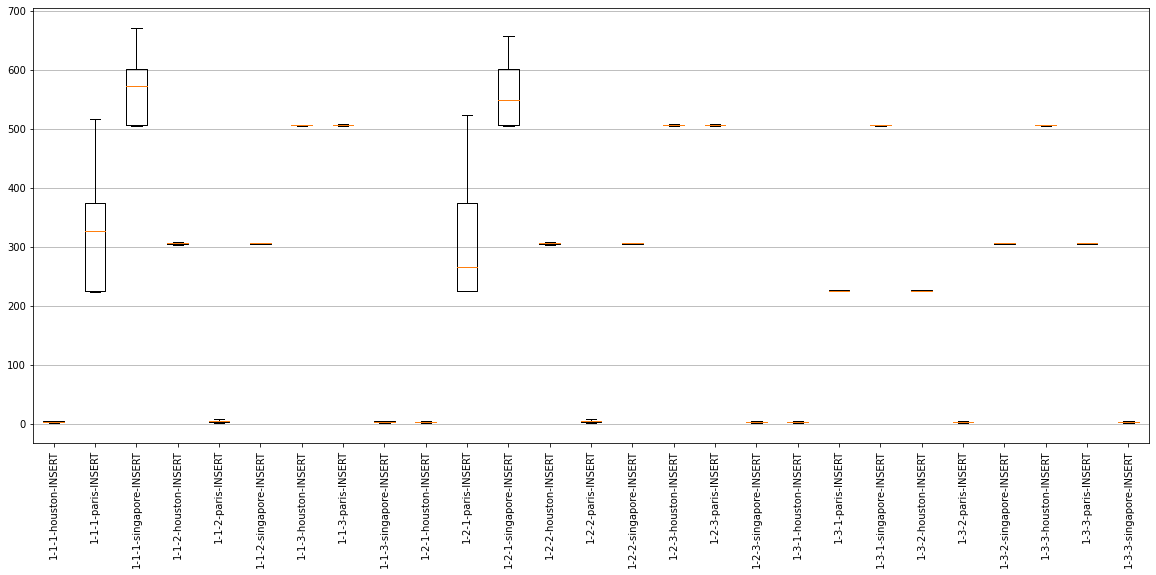

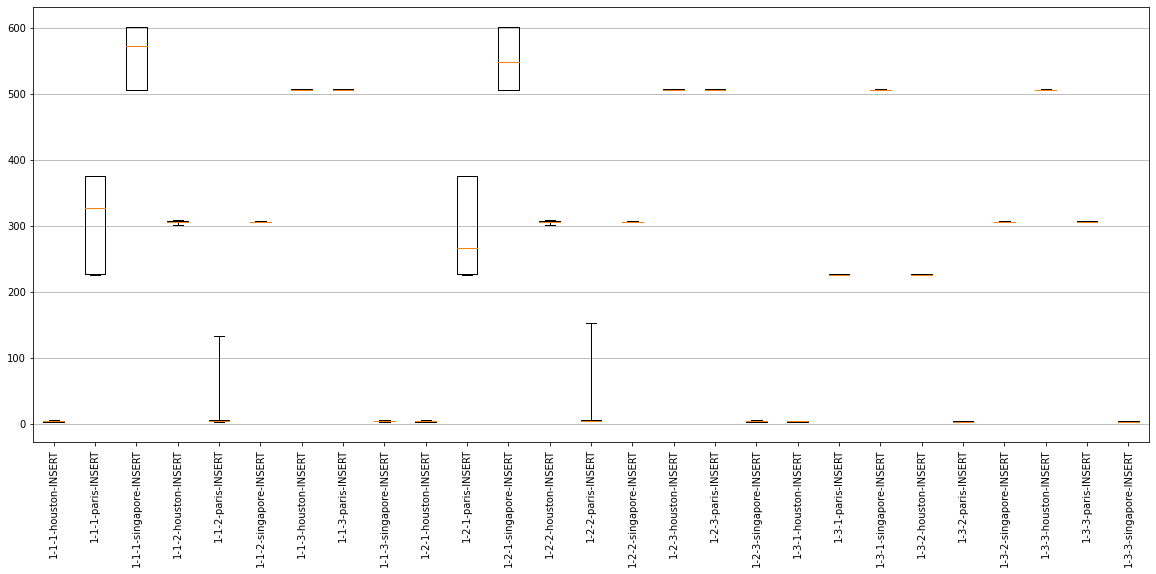

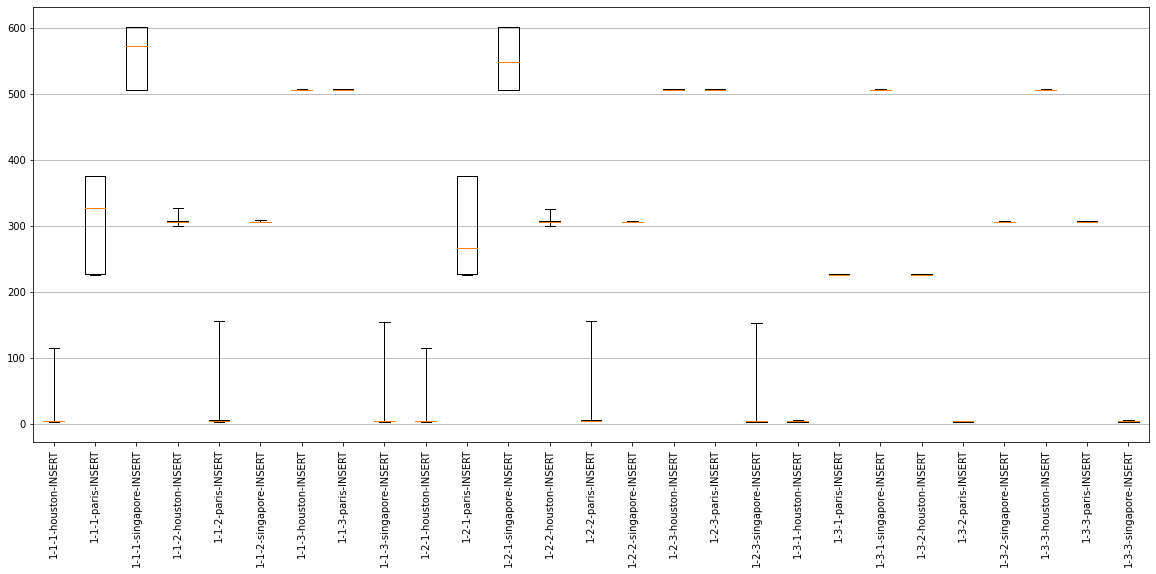

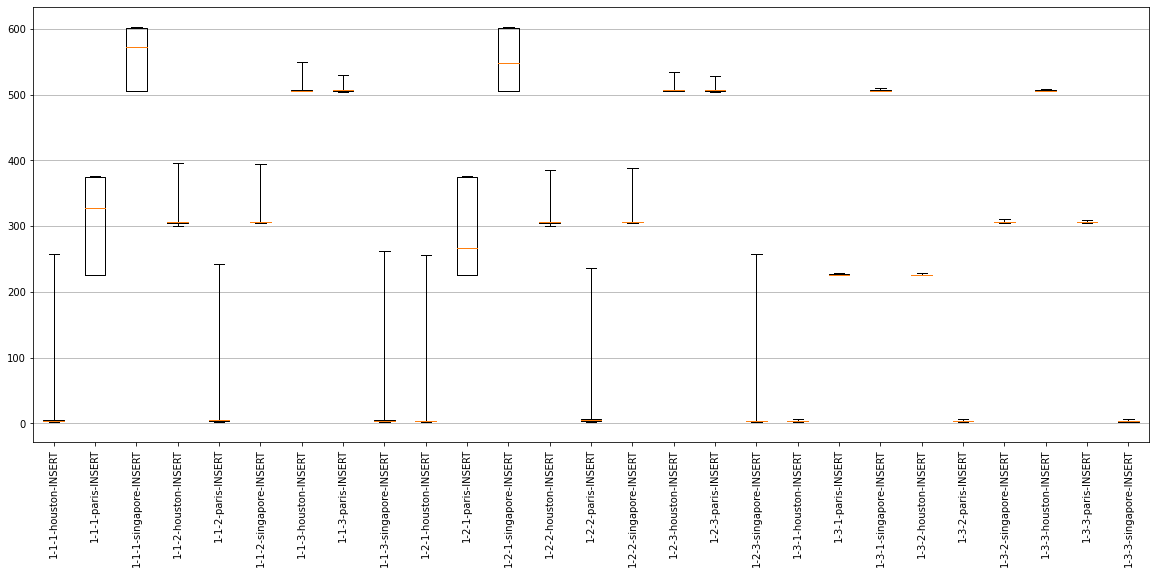

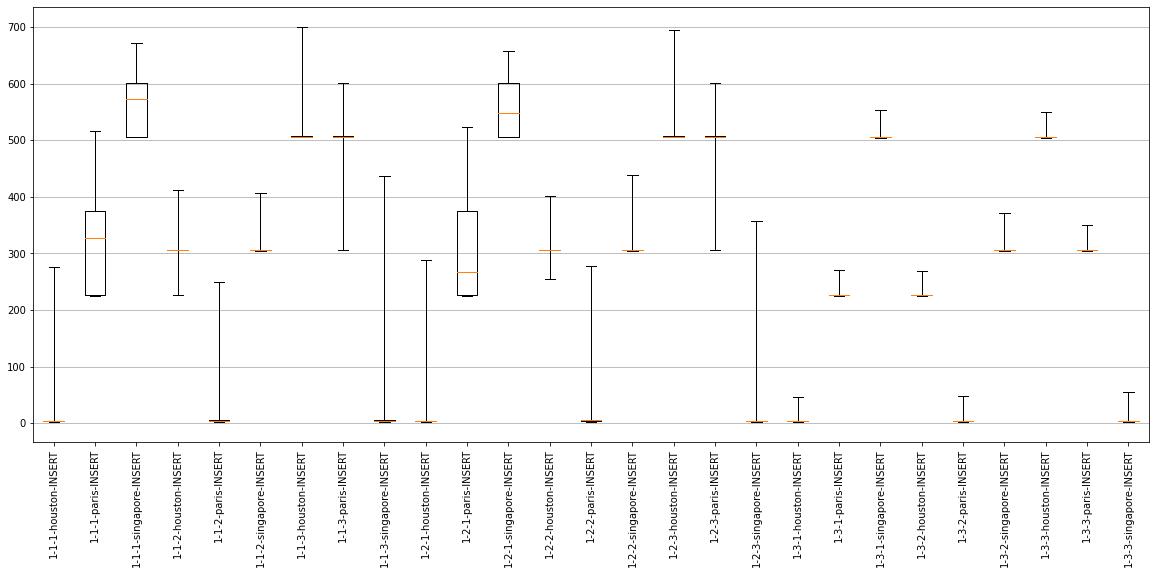

In [24]:
plot(wl_values, wl, replicas, name)

In [25]:
wl = 'workloadhothot'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 1130122.45 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 paris op_serial 0.0 
 	 rep_serial 1130122.45 
 	 op_parallel 0
1-1-1 singapore op_serial 1130122.45 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 nonparallelism 1130122.45
1-1-2 houston op_serial 17104.781 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 paris op_serial 0.0 
 	 rep_serial 17104.781 
 	 op_parallel 0
1-1-2 singapore op_serial 17104.781 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 nonparallelism 17104.781
1-1-3 houston op_serial 1530675.807 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 paris op_serial 0.0 
 	 rep_serial 1530675.807 
 	 op_parallel 0
1-1-3 singapore op_serial 1530675.807 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 nonparallelism 1530675.807
1-2-1 houston op_serial 1129977.376 
 	 rep_serial 0.0 
 	 op_parallel 0.0
1-2-1 paris op_serial 0.0 
 	 rep_serial 1129977.376 
 	 op_parallel 0.0
1-2-1 singapore op_serial 1129977.376 
 	 rep_serial 0.0 
 	 op_parallel 0.0
1-2-1 nonparallelism 1129977.37

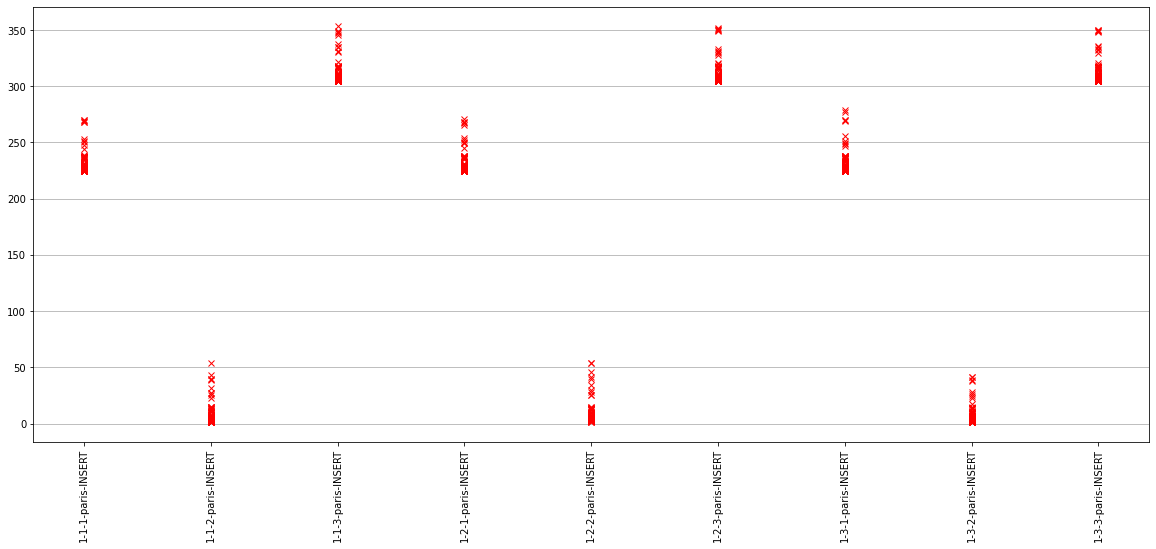

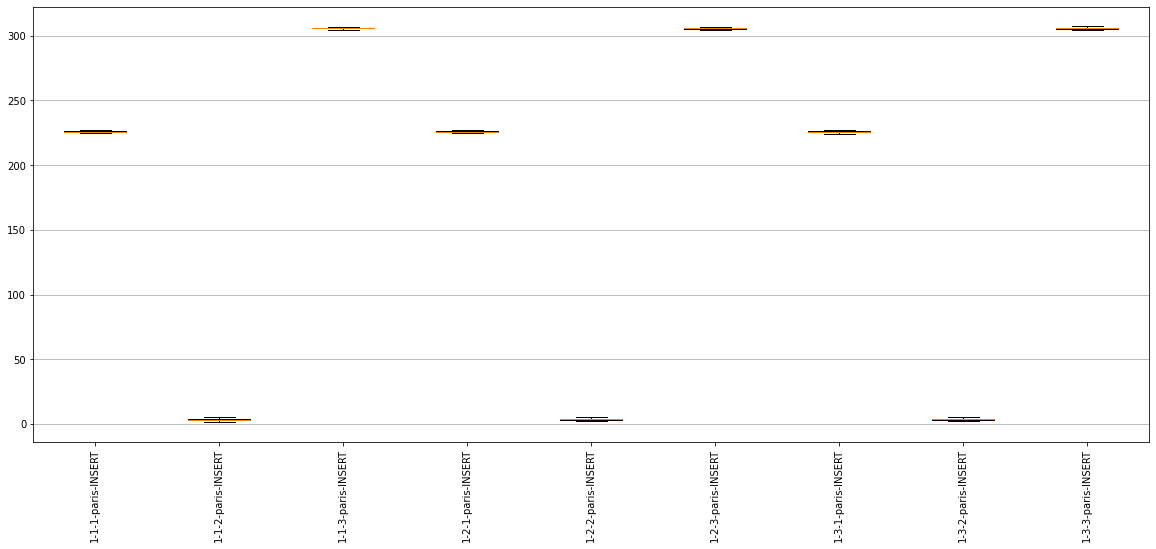

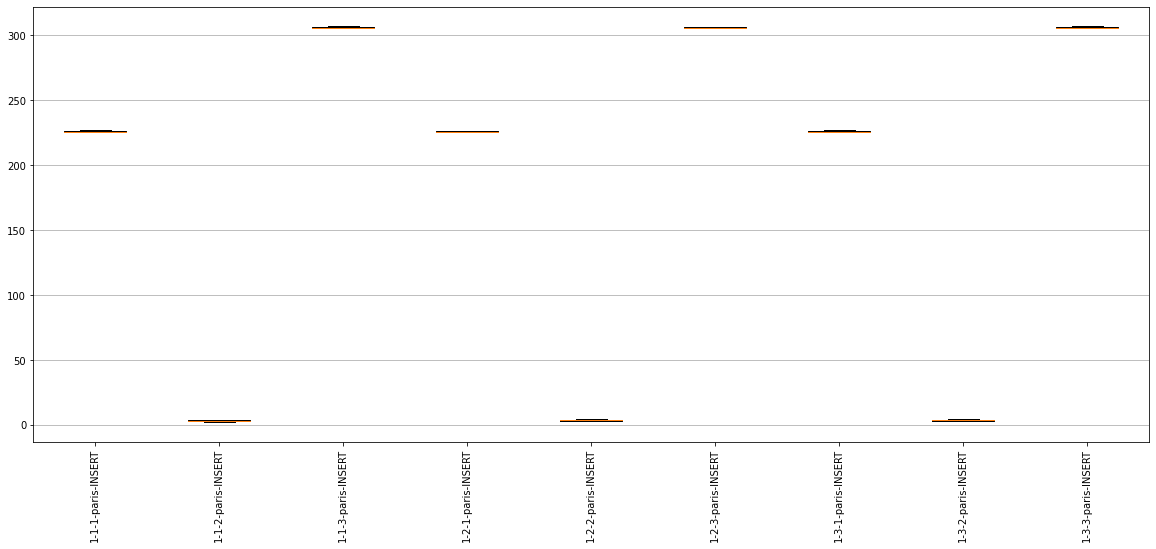

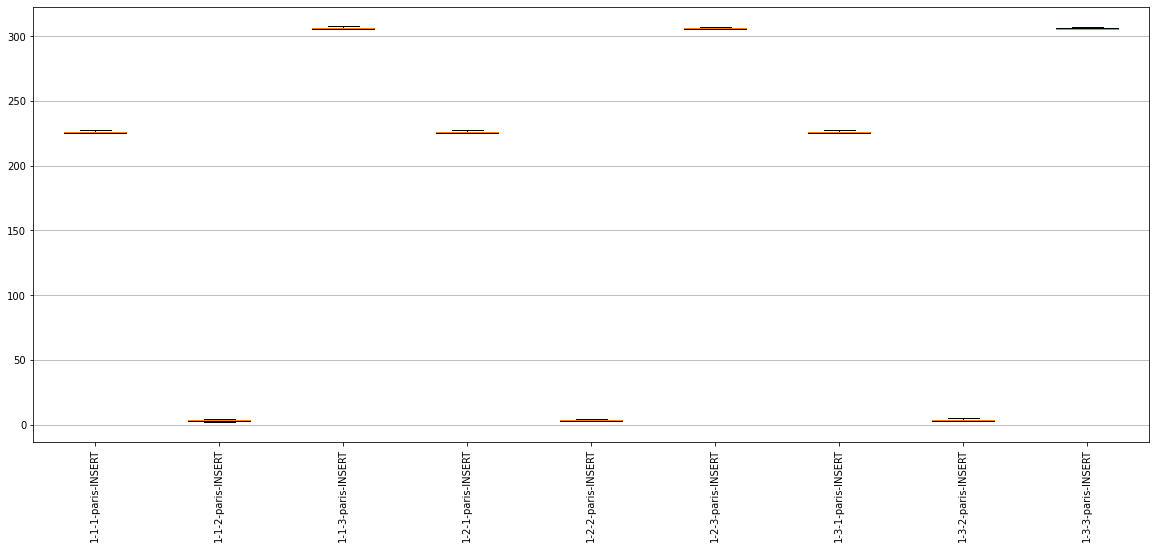

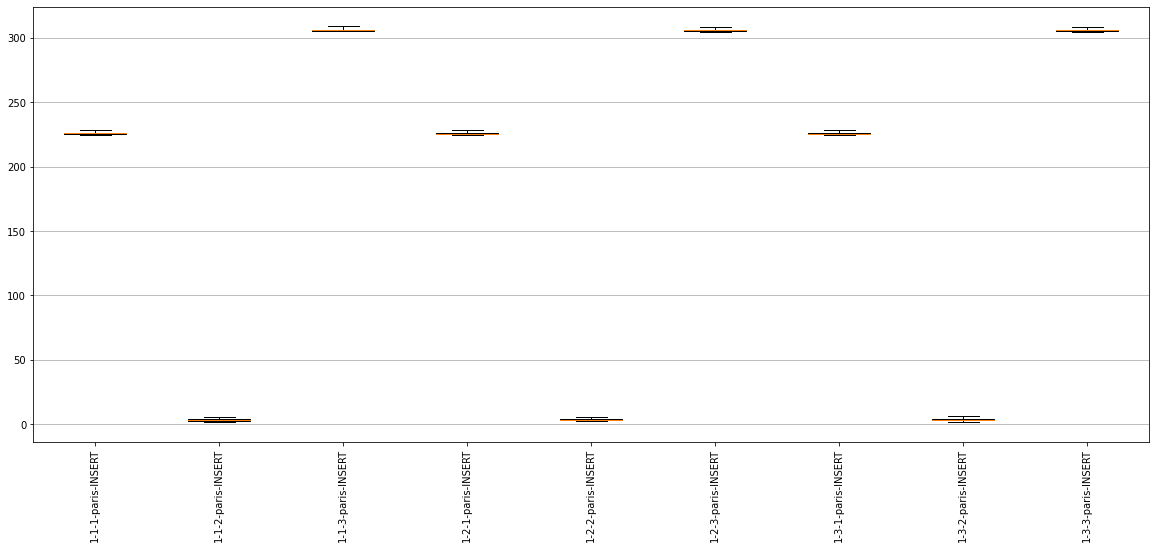

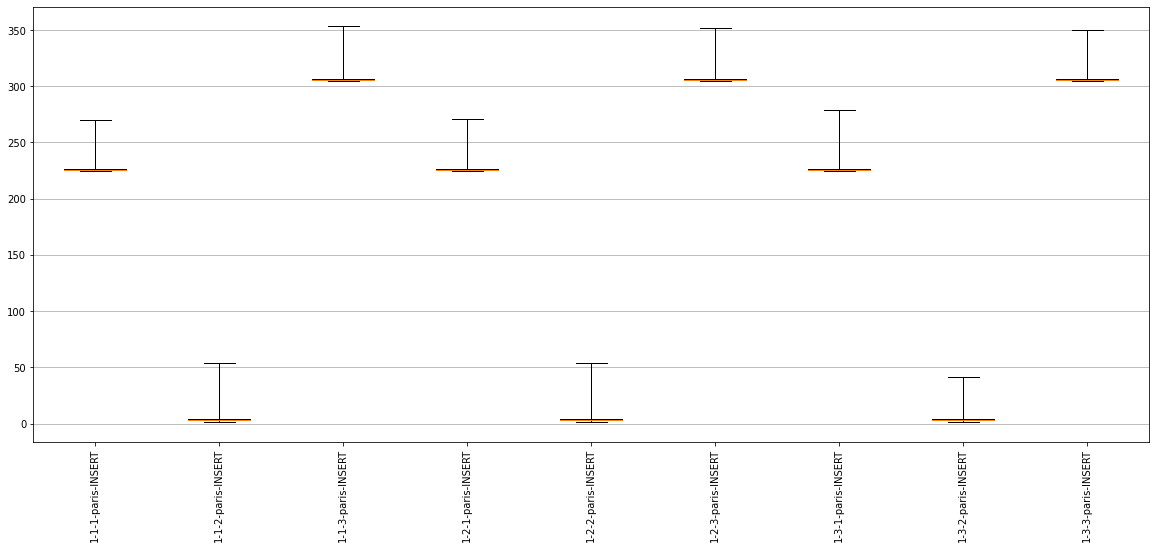

In [26]:
plot(wl_values, wl, replicas, name)

In [27]:
wl = 'workloadhotclust'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 567034.1950000001 
 	 rep_serial 19827.946 
 	 op_parallel 0
1-1-1 paris op_serial 19827.946 
 	 rep_serial 567034.1950000001 
 	 op_parallel 0
1-1-1 singapore op_serial 586862.1410000001 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 nonparallelism 586862.1410000001
1-1-2 houston op_serial 18650.318 
 	 rep_serial 566978.4890000001 
 	 op_parallel 0
1-1-2 paris op_serial 566978.4890000001 
 	 rep_serial 18650.318 
 	 op_parallel 0
1-1-2 singapore op_serial 585628.807 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 nonparallelism 585628.807
1-1-3 houston op_serial 1265114.288 
 	 rep_serial 1266466.94 
 	 op_parallel 0
1-1-3 paris op_serial 1266466.94 
 	 rep_serial 1265114.288 
 	 op_parallel 0
1-1-3 singapore op_serial 2531581.228 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 nonparallelism 2531581.228
1-2-1 houston op_serial 566978.856 
 	 rep_serial 20214.877999999997 
 	 op_parallel 0.0
1-2-1 paris op_serial 20214.877999999997 
 	 rep_serial 566978.856 
 	 op_parallel 

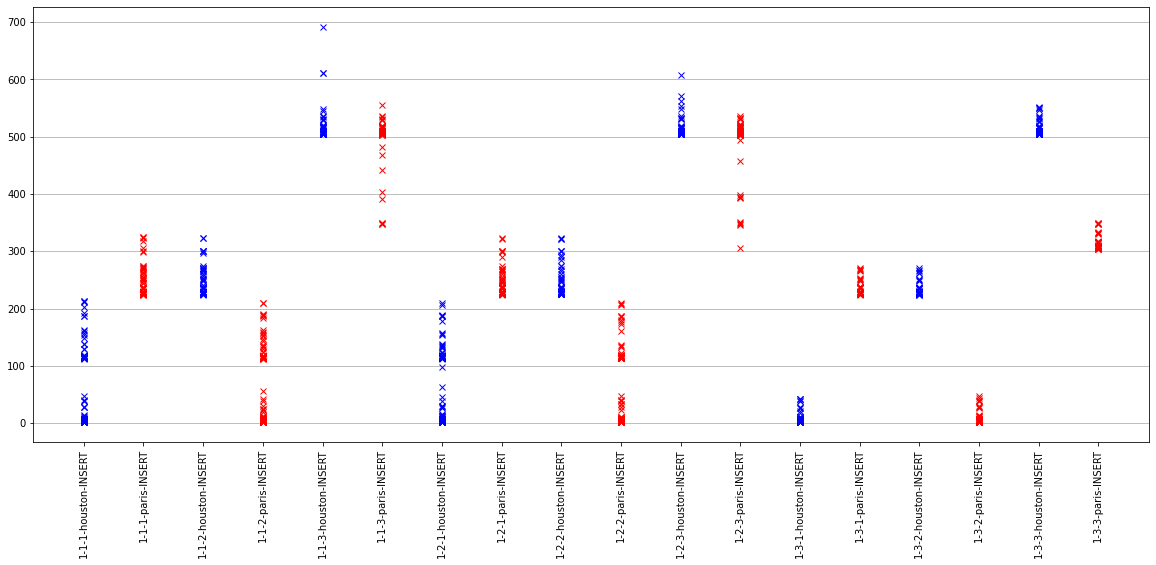

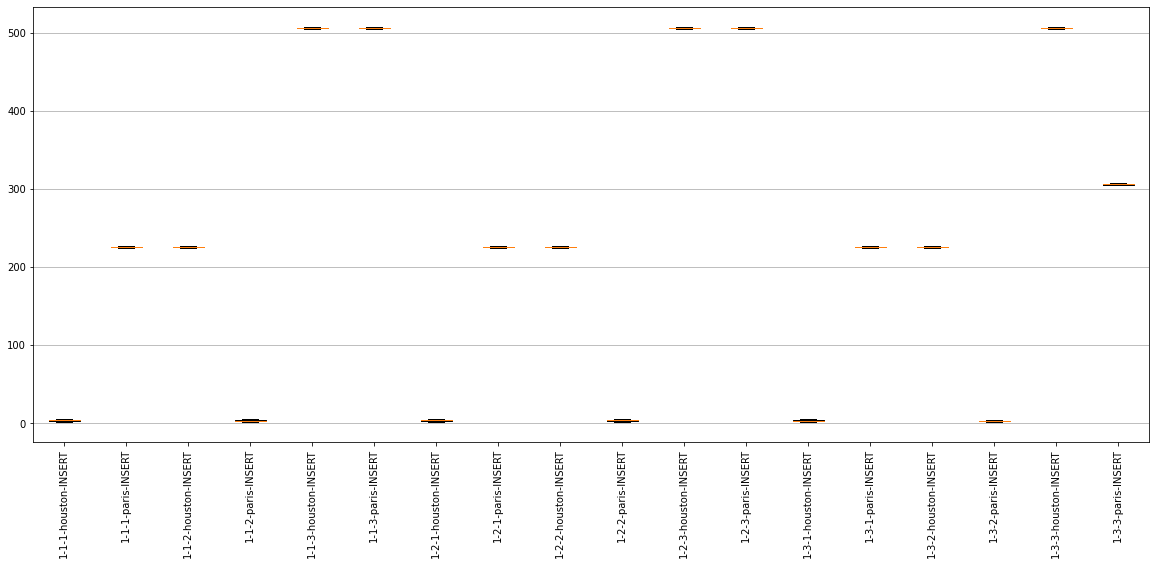

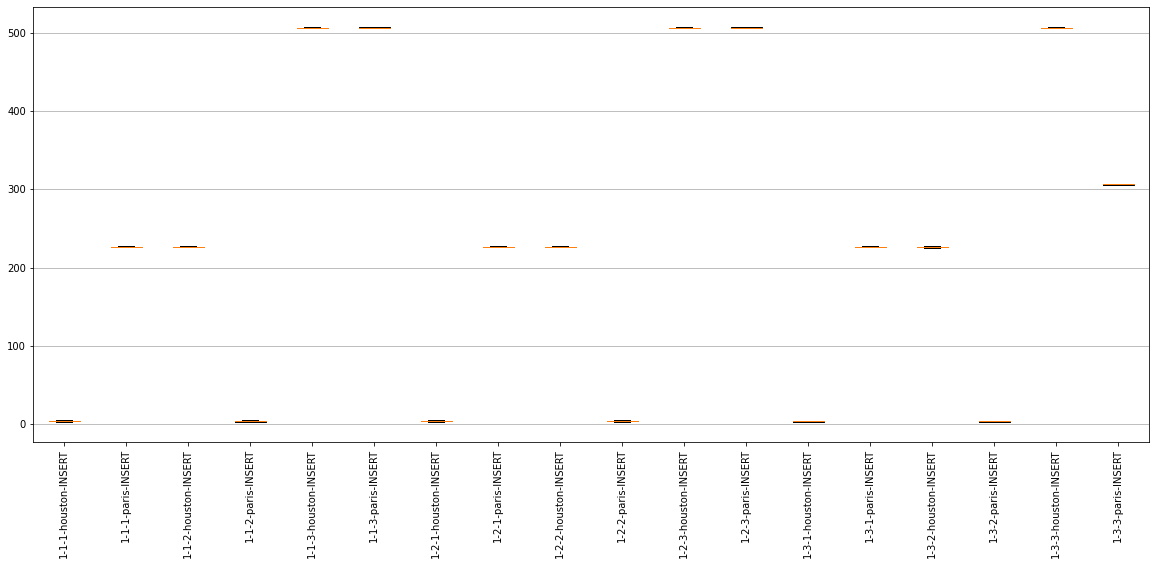

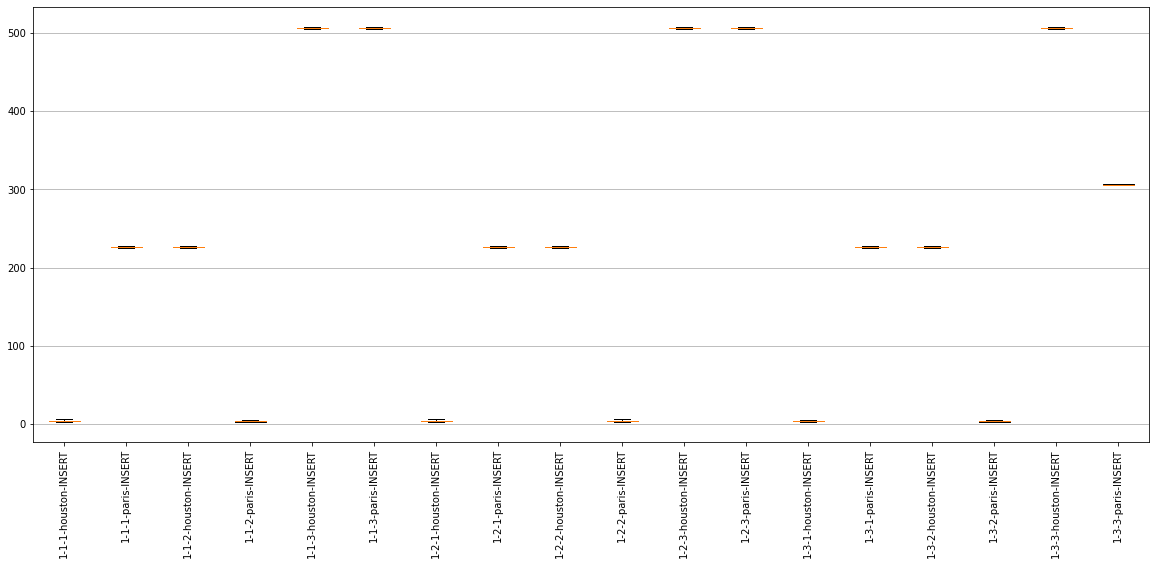

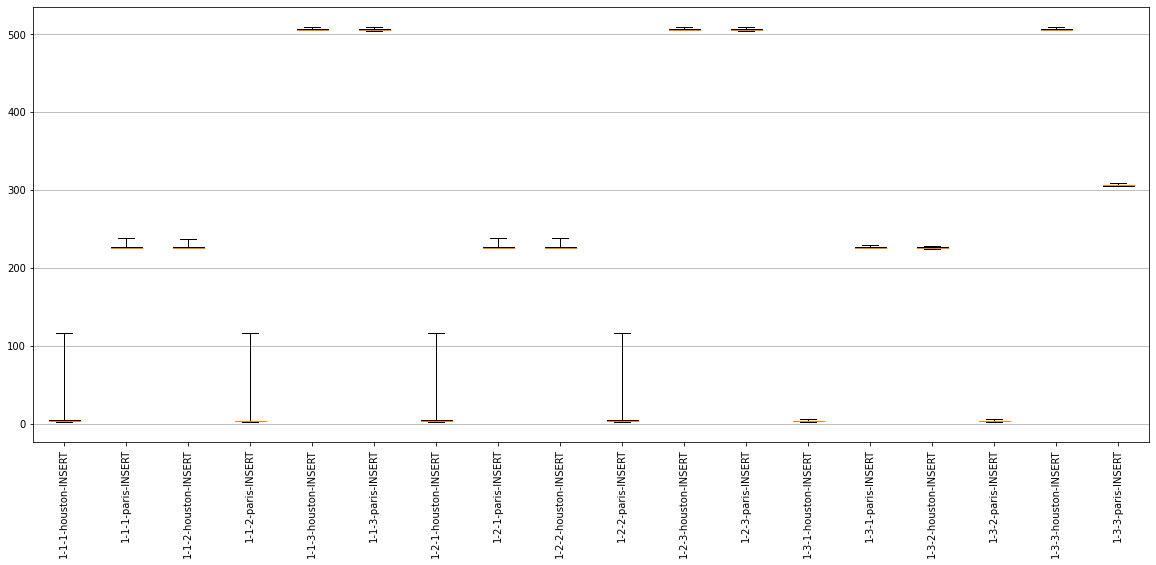

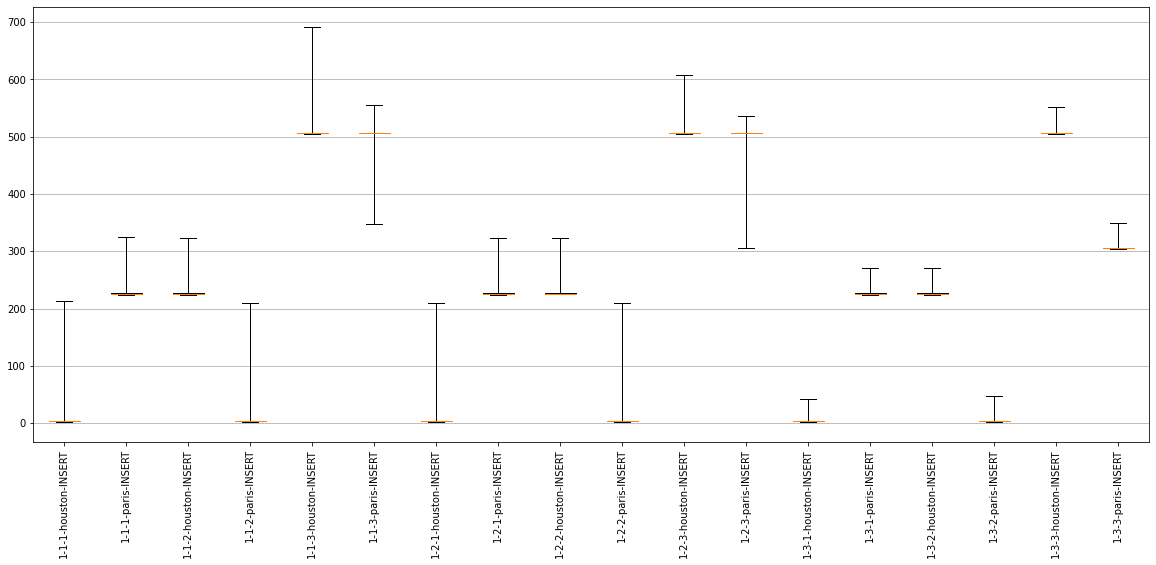

In [28]:
plot(wl_values, wl, replicas, name)

In [29]:
wl = 'workloadF'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 1376403.5389999999 
 	 rep_serial 15168.579 
 	 op_parallel 0
1-1-1 paris op_serial 513871.21400000004 
 	 rep_serial 877700.904 
 	 op_parallel 0
1-1-1 singapore op_serial 892869.483 
 	 rep_serial 498702.635 
 	 op_parallel 0
1-1-1 nonparallelism 1391572.118
1-1-2 houston op_serial 359175.804 
 	 rep_serial 260714.23500000002 
 	 op_parallel 0
1-1-2 paris op_serial 521237.444 
 	 rep_serial 98652.595 
 	 op_parallel 0
1-1-2 singapore op_serial 359366.83 
 	 rep_serial 260523.20900000003 
 	 op_parallel 0
1-1-2 nonparallelism 619890.0390000001
1-1-3 houston op_serial 723983.787 
 	 rep_serial 254588.624 
 	 op_parallel 0
1-1-3 paris op_serial 265517.55100000004 
 	 rep_serial 713054.86 
 	 op_parallel 0
1-1-3 singapore op_serial 967643.484 
 	 rep_serial 10928.927 
 	 op_parallel 0
1-1-3 nonparallelism 978572.4110000001
1-2-1 houston op_serial 672965.132 
 	 rep_serial 8203.650000000001 
 	 op_parallel 639638.63
1-2-1 paris op_serial 0.0 
 	 rep_serial 851044.9

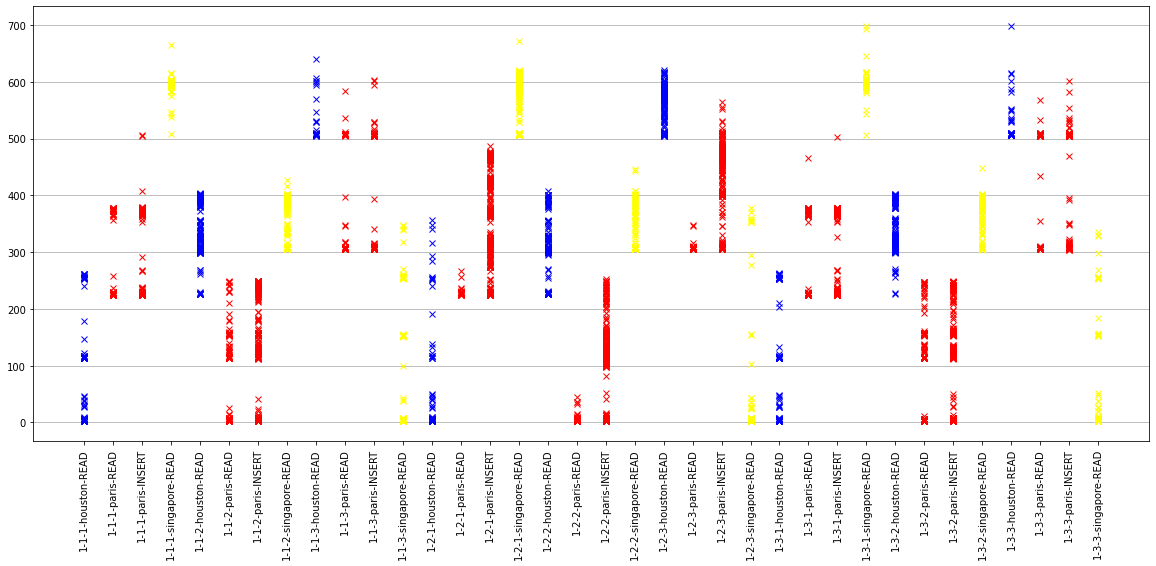

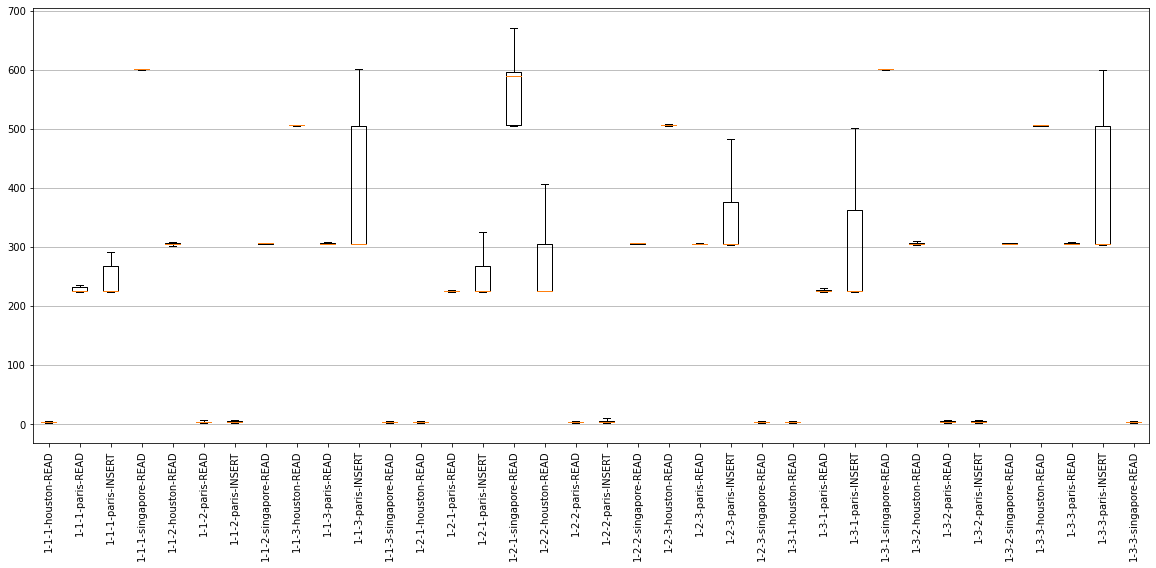

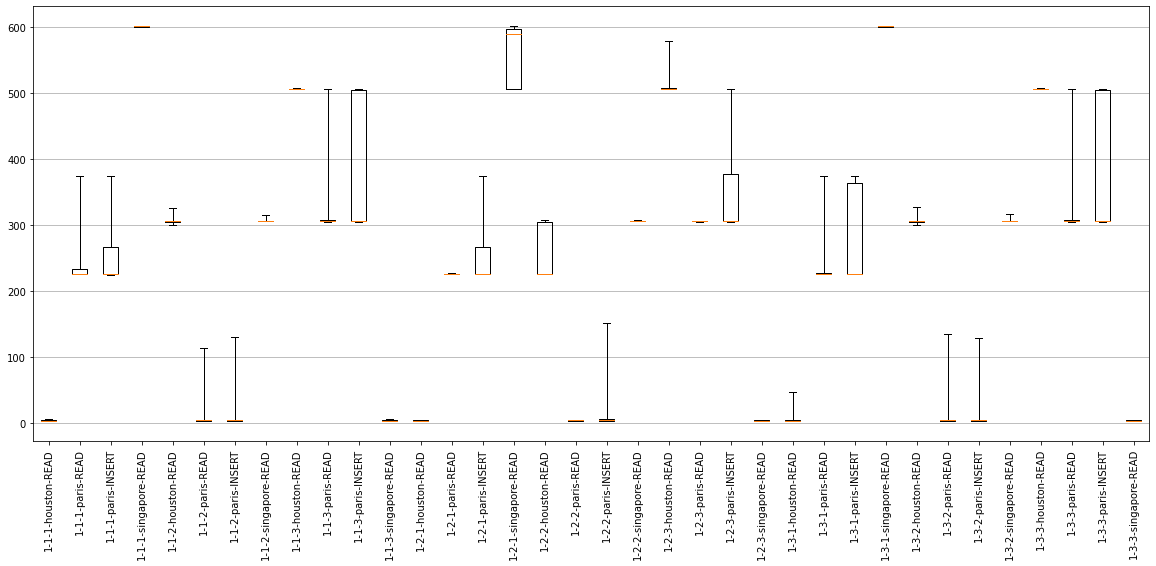

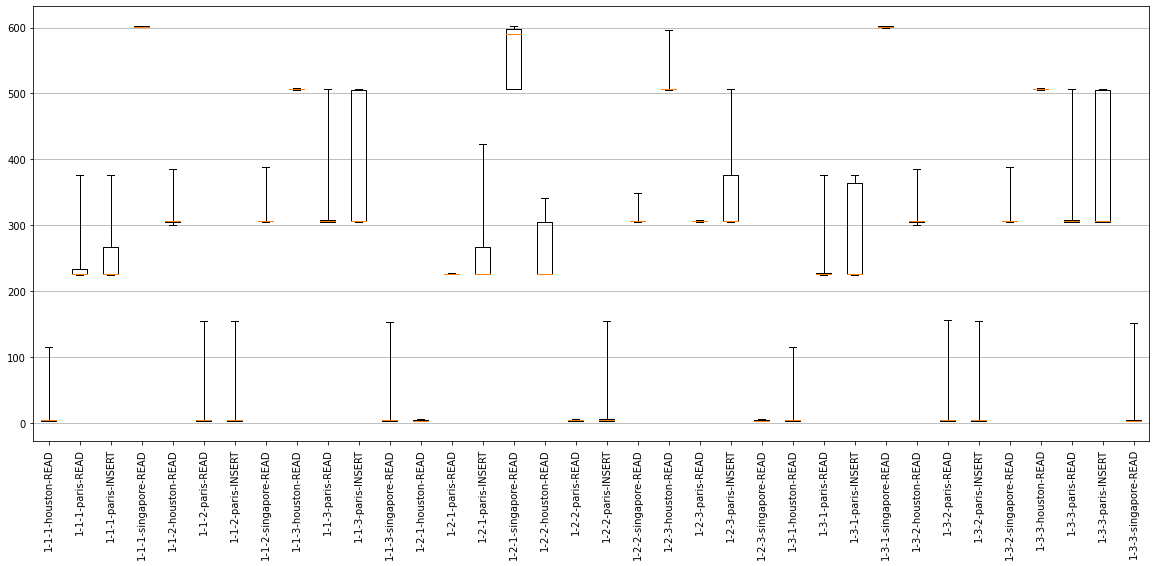

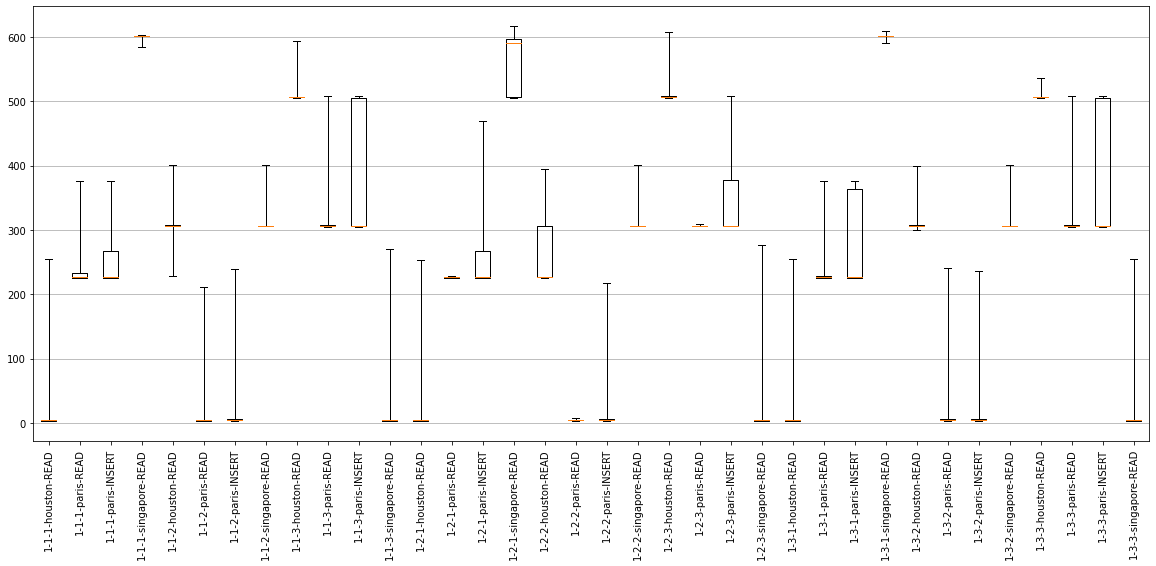

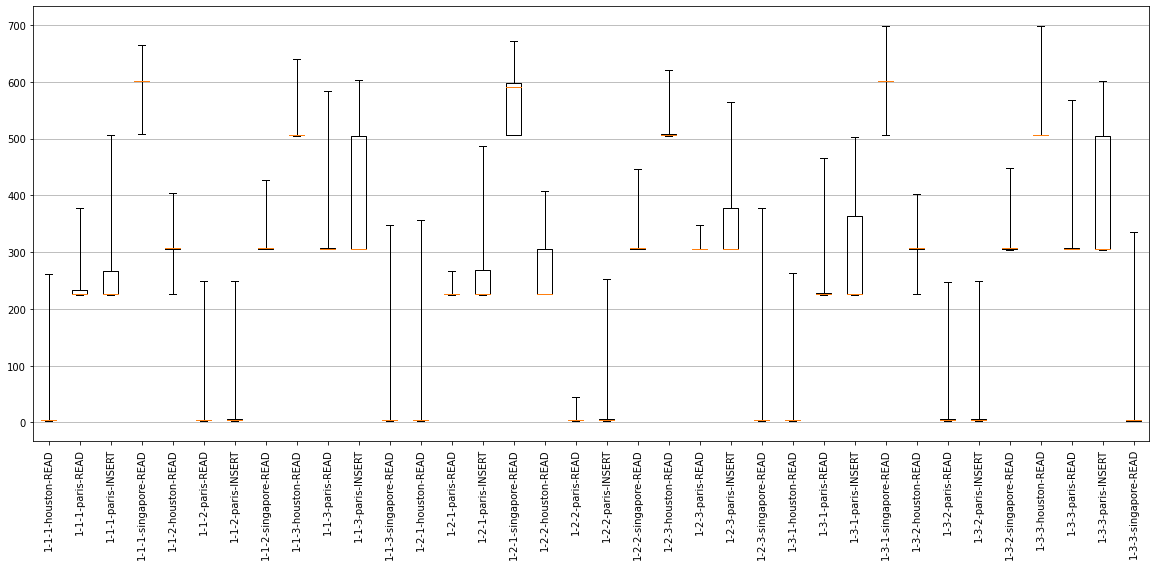

In [30]:
plot(wl_values, wl, replicas, name)

In [31]:
wl = 'workloadG'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 1503212.223 
 	 rep_serial 24807.3 
 	 op_parallel 0
1-1-1 paris op_serial 776186.05 
 	 rep_serial 751833.473 
 	 op_parallel 0
1-1-1 singapore op_serial 776640.773 
 	 rep_serial 751378.75 
 	 op_parallel 0
1-1-1 nonparallelism 1528019.523
1-1-2 houston op_serial 455097.77499999997 
 	 rep_serial 387263.464 
 	 op_parallel 0
1-1-2 paris op_serial 774466.014 
 	 rep_serial 67895.22499999999 
 	 op_parallel 0
1-1-2 singapore op_serial 455158.68899999995 
 	 rep_serial 387202.55 
 	 op_parallel 0
1-1-2 nonparallelism 842361.239
1-1-3 houston op_serial 1040874.861 
 	 rep_serial 634032.5959999999 
 	 op_parallel 0
1-1-3 paris op_serial 659161.4389999999 
 	 rep_serial 1015746.018 
 	 op_parallel 0
1-1-3 singapore op_serial 1649778.614 
 	 rep_serial 25128.843 
 	 op_parallel 0
1-1-3 nonparallelism 1674907.4570000002
1-2-1 houston op_serial 752144.162 
 	 rep_serial 10898.358 
 	 op_parallel 751015.138
1-2-1 paris op_serial 0.0 
 	 rep_serial 752144.162 
 	 op_para

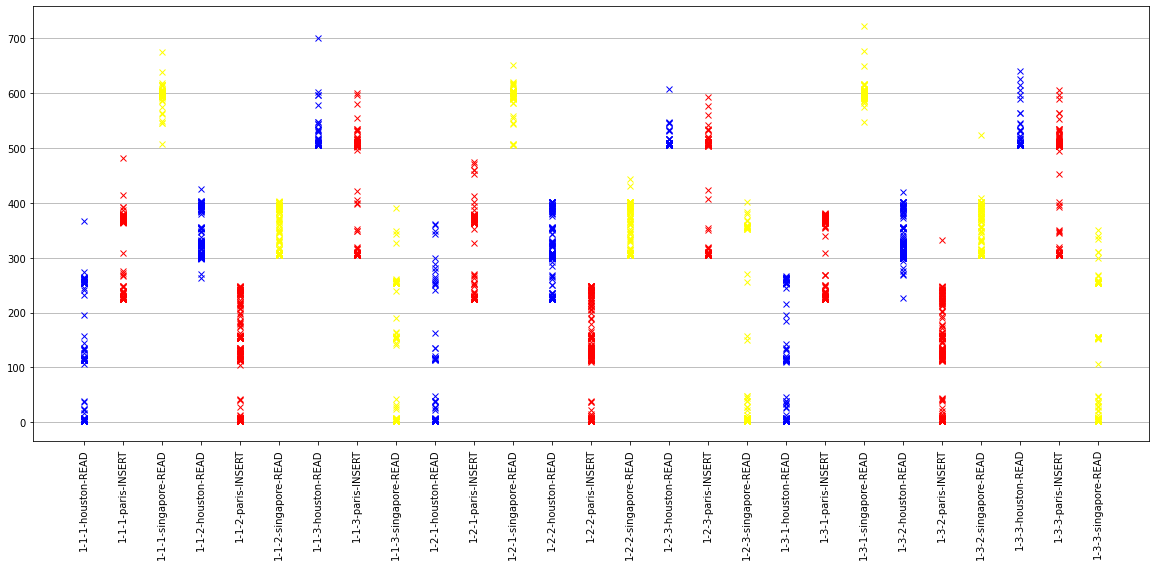

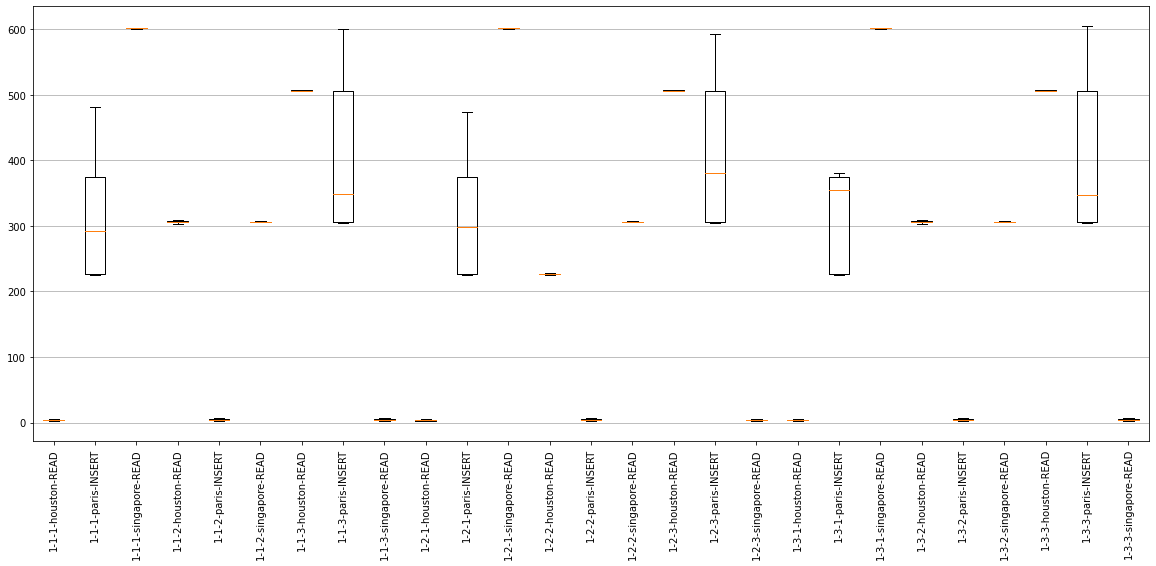

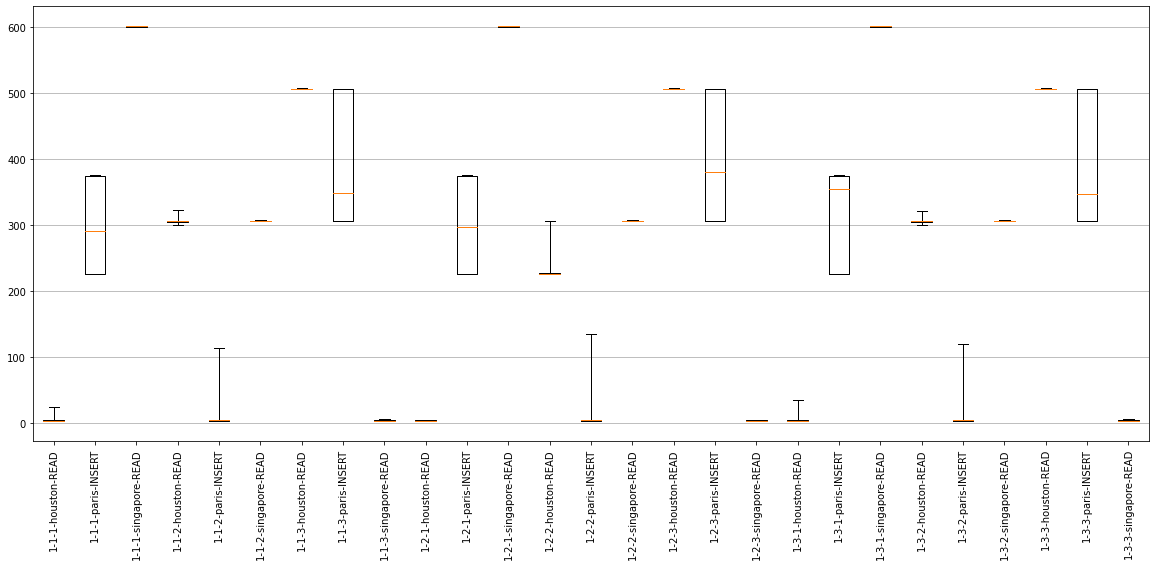

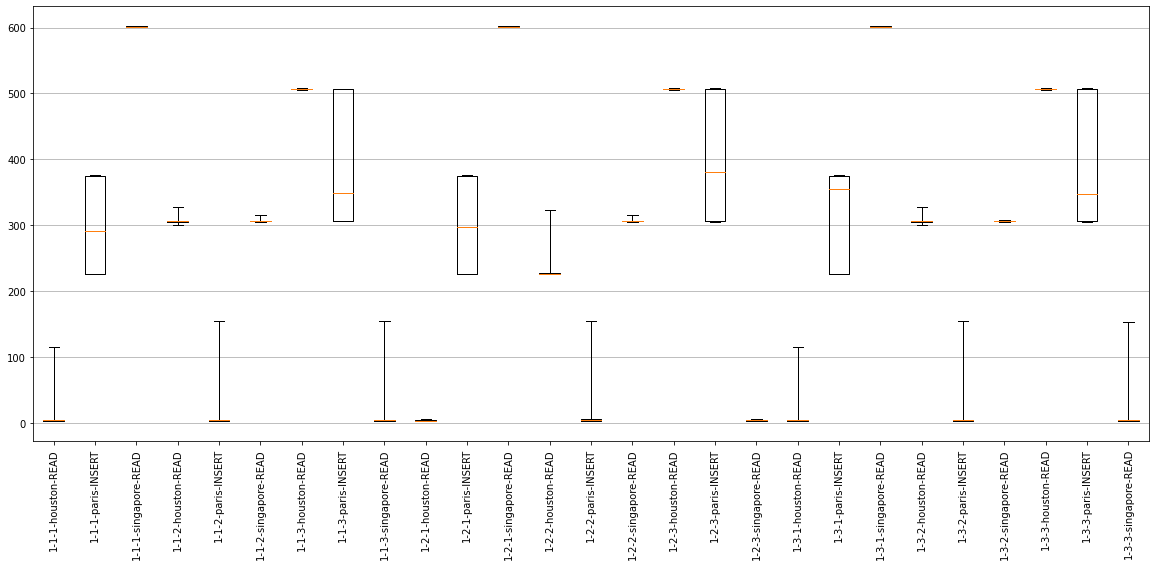

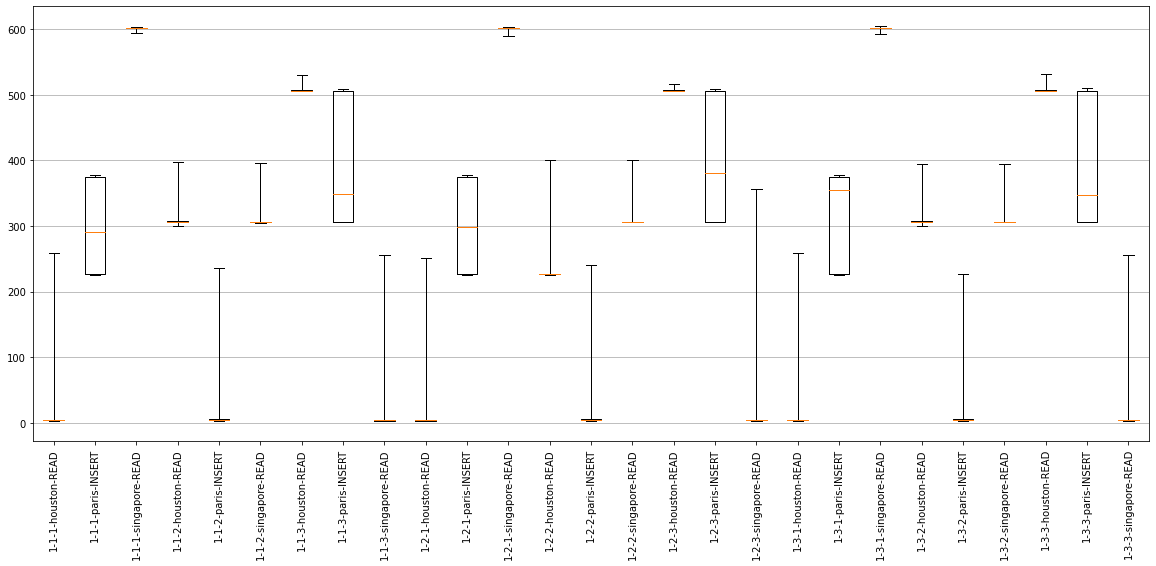

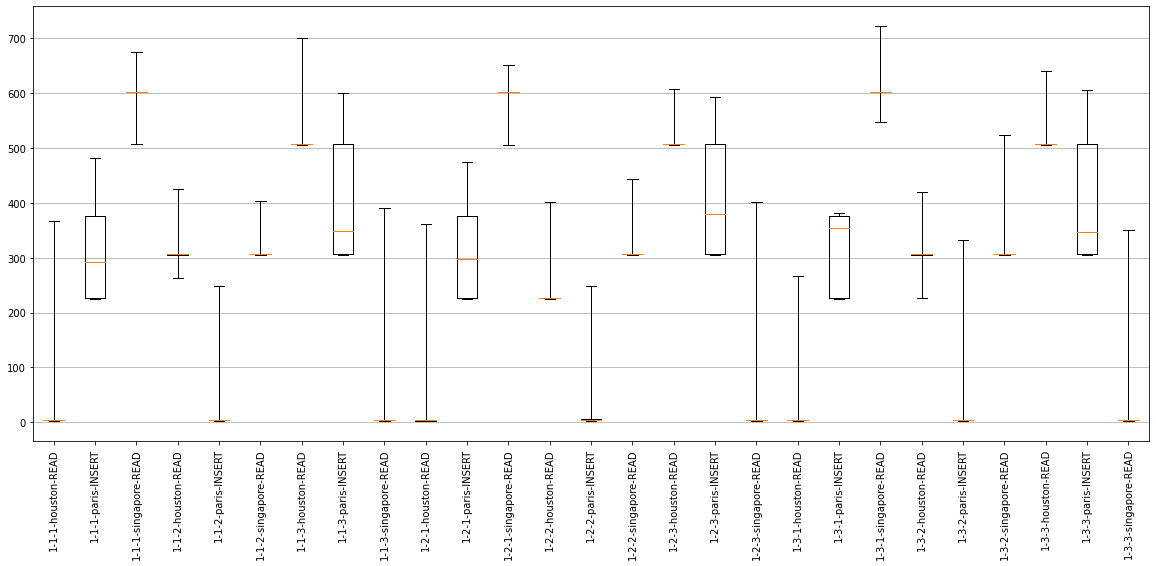

In [32]:
plot(wl_values, wl, replicas, name)